<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/AutoTS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
# finaldf = pd.read_csv('predictions.csv')

In [51]:
ticker = '^NSEBANK'
# ^NSEI, ^NSEBANK
df = yf.download(ticker, start = '2020-04-01')
# ,start='2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [52]:
df.reset_index(inplace = True)

In [53]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,19122.400391,19154.750000,18042.250000,18208.349609,18208.349609,274900
1,2020-04-03,18325.050781,18326.099609,17143.199219,17249.300781,17249.300781,342500
2,2020-04-07,18454.550781,19190.550781,17953.750000,19062.500000,19062.500000,435400
3,2020-04-08,18799.400391,20324.099609,18482.900391,18946.449219,18946.449219,508400
4,2020-04-09,19553.150391,19988.300781,19166.900391,19913.599609,19913.599609,390000


In [54]:
df.shape

(652, 7)

In [55]:
df.sort_values('Date', inplace = True)

In [56]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
647,2022-11-14,42177.550781,42231.449219,41965.449219,42076.750000,42076.750000,142700
648,2022-11-15,42234.851562,42450.050781,42079.550781,42372.699219,42372.699219,139400
649,2022-11-16,42371.800781,42611.750000,42296.300781,42535.300781,42535.300781,185400
650,2022-11-17,42399.648438,42622.750000,42366.550781,42458.050781,42458.050781,165400
651,2022-11-18,42545.750000,42590.750000,42223.699219,42437.449219,42437.449219,280100


In [57]:
# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
# %matplotlib notebook

In [58]:
split = int(round(len(df)*0.7,0))
train_data = df.iloc[:split]
test_data = df.iloc[split:]

In [59]:
split

456

## Forecasting using Auto TS

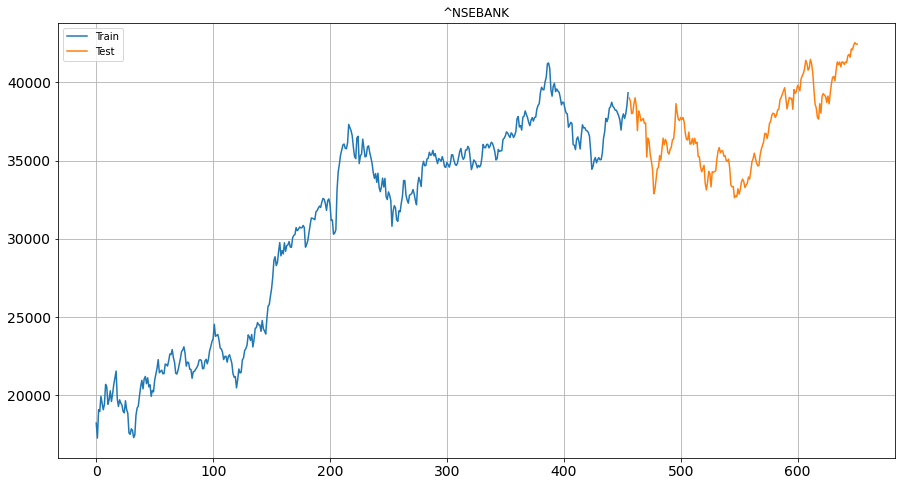

In [60]:
train_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Train')
test_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [61]:
# !pip install autots

In [62]:
from autots import AutoTS

In [63]:
model = AutoTS(forecast_length=3, frequency='infer',  ensemble='simple', drop_data_older_than_periods=split)

In [64]:
mod = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
15/15 [==============================] - 7s 6ms/step - loss: 0.4093
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3999
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3934
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3921
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3907
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3874
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3850
Epoch 8/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3799
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3773
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3686
Epoch 11/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3710
Epoch 12/50
15/15 [==============================] - 0s 8ms/

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ggzvgmgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/27mydz91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42816', 'data', 'file=/tmp/tmpkpj4r36s/ggzvgmgw.json', 'init=/tmp

Model Number: 38 with model FBProphet in generation 0 of 10


07:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 57 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/1runi_9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/w82n1_9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51494', 'data', 'file=/tmp/tmpkpj4r36s/1runi_9g.json', 'init=/tmp/tmpkpj4r36s/w82n1_9b.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelm4f80swg/prophet_model-20221121074330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 58 with model SeasonalNaive in generation 0 of 10
Model Number: 59 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 60 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation 0 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/uw22oc_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ysmz_0l_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81312', 'data', 'file=/tmp/tmpkpj4r36s/uw22oc_i.json', 'init=/tmp/tmpkpj4r36s/ysmz_0l_.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modely1d6v4l4/prophet_model-20221121074333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 72 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 10
Model Number: 74 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35621e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 77 with model WindowRegression in generation 0 of 10
Model Number: 78 with model DatepartRegression in generation 0 of 10
Model Number: 79 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 79: UnivariateRegression
Model Number: 80 with model MultivariateRegression in generation 0 of 10
Model Number: 81 with model UnivariateMotif in generation 0 of 10
Model Number: 82 with model MultivariateMotif in generation 0 of 10
Model Number: 83 with model SectionalMotif in generation 0 of 10
No anomalies detected.
Model Number: 84 with model NVAR in generation 0 of 10
Model Number: 85 with model Theta in generation 0 of 10
Model Number: 86 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 86: ARDL
Model Number: 87 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch`

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Model Number: 106 with model MetricMotif in generation 0 of 10
Model Number: 107 with model SectionalMotif in generation 0 of 10
Model Number: 108 with model SeasonalNaive in generation 0 of 10
Model Number: 109 with model MetricMotif in generation 0 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 109: MetricMotif
Model Number: 110 with model UnivariateMotif in generation 0 of 10
Model Number: 111 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 111: VAR
Model Number: 112 with model UnivariateMotif in generation 0 of 10
Model Number: 113 with model ETS in generation 0 of 10
ETS failed on Close with ValueError('operands could not be broadcast together with shapes (89,) (364,) ')
Model Number: 114 with model SectionalMotif in generation 0 of 10
Model Number: 115 with model LastValueNaive in generation 0 of 10
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 122 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 122: ARCH
Model Number: 123 with model UnivariateRegression in generation 0 of 10
Model Number: 124 with model ConstantNaive in generation 0 of 10
Model Number: 125 with model DatepartRegression in generation 0 of 10
Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 126: GLM
Model Number: 127 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 127: ARDL
Model Number: 128 with model SectionalMotif in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35621e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 128: SectionalMotif
Model Number: 129 with model DatepartRegression in generation 0 of 10
Model Number: 130 with model NVAR in generation 0 of 10
Model Number: 131 with model SeasonalityMotif in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 132 with model SeasonalityMotif in generation 0 of 10
Model Number: 133 with model LastValueNaive in generation 0 of 10
Model Number: 134 with model WindowRegression in generation 0 of 10
Model Number: 135 with model Theta in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 136 with model SeasonalNaive in generation 0 of 10
Model Number: 137 with model UnobservedComponents in generation 0 of 10
Model Number: 138 with model SeasonalityMotif in generation 0 of 10
Model Number: 139 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 139: GLM
Model Number: 140 with model SectionalMotif in generation 0 of 10
Model Number: 141 with model MultivariateMotif in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Model Number: 142 with model UnivariateRegression in generation 0 of 10
Model Number: 143 with model GLS in generation 0 of 10
Model Number: 144 with model UnivariateRegression in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 144: UnivariateRegression
Model Number: 145 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 145: GluonTS
Model Number: 146 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 146: GLM
Model Number: 147 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 147: ARCH
Model Number: 148 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 148: VAR
Model Number: 149 with model Un

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1199: Runt

Model Number: 151 with model Theta in generation 0 of 10
Model Number: 152 with model LastValueNaive in generation 0 of 10
Model Number: 153 with model SeasonalityMotif in generation 0 of 10
Model Number: 154 with model Theta in generation 0 of 10
Model Number: 155 with model MultivariateMotif in generation 0 of 10
Model Number: 156 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 156: FBProphet
Model Number: 157 with model MetricMotif in generation 0 of 10
Model Number: 158 with model UnobservedComponents in generation 0 of 10
Model Number: 159 with model GLS in generation 0 of 10
Model Number: 160 with model SectionalMotif in generation 0 of 10
Model Number: 161 with model GLS in generation 0 of 10
Model Number: 162 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 162: VECM
Model Number: 163 with model UnivariateMotif in generatio

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 198 with model NVAR in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 199 with model DatepartRegression in generation 1 of 10
Model Number: 200 with model ARIMA in generation 1 of 10
Model Number: 201 with model AverageValueNaive in generation 1 of 10
Model Number: 202 with model ConstantNaive in generation 1 of 10
Model Number: 203 with model MetricMotif in generation 1 of 10
Model Number: 204 with model NVAR in generation 1 of 10
Model Number: 205 with model LastValueNaive in generation 1 of 10
Model Number: 206 with model SeasonalNaive in generation 1 of 10
Model Number: 207 with model MetricMotif in generation 1 of 10
Model Number: 208 with model GLS in generation 1 of 10
Model Number: 209 with model ARIMA in generation 1 of 10
Model Number: 210 with model SeasonalNaive in generation 1 of 10
Model Number: 211 with model UnivariateRegression in generation 1 of 10
Model Number: 212 with model MultivariateMotif in generation 1 of 10
Model Number: 213 with model UnobservedComponents in generation 1 of 10
Model Number: 214 with model Section

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 221 with model UnivariateMotif in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 222 with model LastValueNaive in generation 1 of 10
Model Number: 223 with model Theta in generation 1 of 10
Model Number: 224 with model SeasonalityMotif in generation 1 of 10
Model Number: 225 with model SeasonalNaive in generation 1 of 10
Model Number: 226 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 227 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


Model Number: 228 with model LastValueNaive in generation 1 of 10
Model Number: 229 with model MetricMotif in generation 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 230 with model UnivariateMotif in generation 1 of 10
Model Number: 231 with model MultivariateRegression in generation 1 of 10
Model Number: 232 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 233 with model DatepartRegression in generation 1 of 10
Epoch 1/100
8/8 [==============================] - 6s 228ms/step - loss: 129782.8750 - val_loss: 1937.1494
Epoch 2/100
8/8 [==============================] - 1s 170ms/step - loss: 123076.5859 - val_loss: 4685.2261
Epoch 3/100
8/8 [==============================] - 1s 171ms/step - loss: 116857.5391 - val_loss: 4530.4492
Epoch 4/100
8/8 [==============================] - 1s 172ms/step - loss: 100267.7344 - val_loss: 23806.9980
Epoch 5/100
8/8 [==============================] - 1s 170ms/step - loss: 109073.7734 - val_loss: 21498.3145
Epoch 6/100
8/8 [==============================] - 1s 172ms/step - loss: 98268.4375 - val_loss: 3989.0464
Epoch 7/100
8/8 [==============================] - 1s 174ms/step - loss: 97234.5469 - val_loss: 1268.9386
Epoch 8/100
8/8 [==============================] - 1s 169ms/step - loss: 97378.6094 - val_loss: 7573.4829
Epoch 9/100
8/8 [==============================] - 1s 172ms/step - loss: 94

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/kgwe7xmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/0arjou0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37104', 'data', 'file=/tmp/tmpkpj4r36s/kgwe7xmg.json', 'init=/tmp/tmpkpj4r36s/0arjou0w.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelm6vk6183/prophet_model-20221121074702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 249 with model UnobservedComponents in generation 1 of 10
Model Number: 250 with model LastValueNaive in generation 1 of 10
Model Number: 251 with model ARIMA in generation 1 of 10
Model Number: 252 with model ETS in generation 1 of 10
Model Number: 253 with model GLS in generation 1 of 10
Model Number: 254 with model LastValueNaive in generation 1 of 10
Model Number: 255 with model SeasonalNaive in generation 1 of 10
Model Number: 256 with model MultivariateRegression in generation 1 of 10
Model Number: 257 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 257: UnivariateRegression
Model Number: 258 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 258: LastValueNaive
Model Number: 259 with model MetricMotif in generation 1 of 10
Model Number: 260 with model MultivariateRegression i

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 307 with model GLS in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 308 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 308: WindowRegression
Model Number: 309 with model ARIMA in generation 1 of 10
Model Number: 310 with model DatepartRegression in generation 1 of 10
Epoch 1/200
6/6 [==============================] - 9s 262ms/step - loss: 412241.7812 - val_loss: 43048.3555
Epoch 2/200
6/6 [==============================] - 1s 143ms/step - loss: 363629.9375 - val_loss: 20631.8398
Epoch 3/200
6/6 [==============================] - 1s 144ms/step - loss: 351282.5000 - val_loss: 60195.7656
Epoch 4/200
6/6 [==============================] - 1s 141ms/step - loss: 336273.5625 - val_loss: 64470.0664
Epoch 5/200
6/6 [==============================] - 1s 140ms/step - loss: 313018.0625 - val_loss: 36266.9336
Epoch 6/200
6/6 [==============================] - 1s 144ms/step - loss: 287862.3750 - val_loss: 24277.0684
Epoch 7/200
6/6 [====================

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 337 with model LastValueNaive in generation 2 of 10
Model Number: 338 with model GLS in generation 2 of 10
Model Number: 339 with model LastValueNaive in generation 2 of 10
Model Number: 340 with model AverageValueNaive in generation 2 of 10
Model Number: 341 with model UnobservedComponents in generation 2 of 10
Model Number: 342 with model WindowRegression in generation 2 of 10
Model Number: 343 with model MetricMotif in generation 2 of 10
Model Number: 344 with model ARIMA in generation 2 of 10
Model Number: 345 with model WindowRegression in generation 2 of 10
Model Number: 346 with model UnivariateMotif in generation 2 of 10
Model Number: 347 with model Theta in generation 2 of 10
Model Number: 348 with model ConstantNaive in generation 2 of 10
Model Number: 349 with model UnobservedComponents in generation 2 of 10
Model Number: 350 with model LastValueNaive in generation 2 of 10
Model Number: 351 with model SeasonalityMotif in generation 2 of 10
Model Number: 352 wit

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 367 with model WindowRegression in generation 2 of 10
Model Number: 368 with model MetricMotif in generation 2 of 10
Model Number: 369 with model UnobservedComponents in generation 2 of 10
Model Number: 370 with model UnobservedComponents in generation 2 of 10
Model Number: 371 with model SeasonalNaive in generation 2 of 10
Model Number: 372 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 372: DatepartRegression
Model Number: 373 with model ETS in generation 2 of 10
Model Number: 374 with model ConstantNaive in generation 2 of 10
Model Number: 375 with model AverageValueNaive in generation 2 of 10
Model Number: 376 with model SeasonalityMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 376: SeasonalityMotif
Model Number: 377 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD f

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 403 with model SectionalMotif in generation 2 of 10
Model Number: 404 with model Theta in generation 2 of 10
Model Number: 405 with model LastValueNaive in generation 2 of 10
Model Number: 406 with model MultivariateRegression in generation 2 of 10
Model Number: 407 with model ETS in generation 2 of 10
Model Number: 408 with model ARIMA in generation 2 of 10
Model Number: 409 with model NVAR in generation 2 of 10
Model Number: 410 with model NVAR in generation 2 of 10
Model Number: 411 with model Theta in generation 2 of 10
Model Number: 412 with model NVAR in generation 2 of 10
Model Number: 413 with model MultivariateRegression in generation 2 of 10
Model Number: 414 with model ConstantNaive in generation 2 of 10
Model Number: 415 with model Theta in generation 2 of 10
Model Number: 416 with model SeasonalNaive in generation 2 of 10
Model Number: 417 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Model DatepartRegression returned Na

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 421 with model UnivariateMotif in generation 2 of 10
Model Number: 422 with model WindowRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Model Number: 423 with model DatepartRegression in generation 2 of 10
Model Number: 424 with model MetricMotif in generation 2 of 10
Model Number: 425 with model MultivariateRegression in generation 2 of 10
Model Number: 426 with model ARIMA in generation 2 of 10
Model Number: 427 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 428 with model Theta in generation 2 of 10
Model Number: 429 with model UnobservedComponents in generation 2 of 10
Model Number: 430 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 430: MultivariateRegression
Model Number: 431 with model UnobservedComponents in generation 2 of 10
Model Number: 432 with model UnobservedComponents in generation 2 of 10
Model Number: 433 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 433: DatepartRegression
Model Number: 434 with model SeasonalNaive in generation 2 of 10
Model Number: 435 with model GLS in generation 2 of 10
Model Number: 436 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 437 with model Theta in generation 2 of 10
Model Number: 438 with model Theta in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 438: Theta
Model Number: 439 with model Theta in generation 2 of 10
Model Number: 440 with model Theta in generation 2 of 10
Model Number: 441 with model GLS in generation 2 of 10
Model Number: 442 with model AverageValueNaive in generation 2 of 10
Model Number: 443 with model UnivariateRegression in generation 2 of 10
No anomalies detected.
Model Number: 444 with model UnivariateMotif in generation 2 of 10
Model Number: 445 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 446 with model GLS in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/cjrj7u6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/mch8t6f9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78135', 'data', 'file=/tmp/tmpkpj4r36s/cjrj7u6a.json', 'init=/tmp/tmpkpj4r36s/mch8t6f9.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelw6ynqgyw/prophet_model-20221121074939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 447 with model FBProphet in generation 2 of 10


07:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 448 with model ConstantNaive in generation 2 of 10
Model Number: 449 with model ConstantNaive in generation 2 of 10
Model Number: 450 with model ETS in generation 2 of 10
Model Number: 451 with model DatepartRegression in generation 2 of 10
Model Number: 452 with model LastValueNaive in generation 2 of 10
Model Number: 453 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


New Generation: 3 of 10
Model Number: 454 with model GLS in generation 3 of 10
Model Number: 455 with model ETS in generation 3 of 10
Model Number: 456 with model AverageValueNaive in generation 3 of 10
Model Number: 457 with model UnivariateMotif in generation 3 of 10
Model Number: 458 with model UnivariateMotif in generation 3 of 10
Model Number: 459 with model Theta in generation 3 of 10
Model Number: 460 with model MultivariateMotif in generation 3 of 10
Model Number: 461 with model ARIMA in generation 3 of 10
Model Number: 462 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 462: DatepartRegression
Model Number: 463 with model UnivariateMotif in generation 3 of 10
Model Number: 464 with model AverageValueNaive in generation 3 of 10
Model Number: 465 with model UnivariateRegression in generation 3 of 10
Model Number: 466 with model ETS in generation 3 of 10
Model Number: 467 with mo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 511 with model ConstantNaive in generation 3 of 10
Model Number: 512 with model UnobservedComponents in generation 3 of 10
Model Number: 513 with model UnobservedComponents in generation 3 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 513: UnobservedComponents
Model Number: 514 with model ETS in generation 3 of 10
Model Number: 515 with model ARIMA in generation 3 of 10
Model Number: 516 with model GLS in generation 3 of 10
Model Number: 517 with model MetricMotif in generation 3 of 10
Model Number: 518 with model LastValueNaive in generation 3 of 10
Model Number: 519 with model NVAR in generation 3 of 10
Model Number: 520 with model WindowRegression in generation 3 of 10
Model Number: 521 with model MultivariateMotif in generation 3 of 10
Model Number: 522 with model MetricMotif in generation 3 of 10
Model Number: 523 with model Theta in generation 3 of 10
Model Number: 524 with model SeasonalityMotif in generation 3 of 10
Template Eval Error: Except

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 540 with model LastValueNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 541 with model SeasonalityMotif in generation 3 of 10
Model Number: 542 with model SeasonalNaive in generation 3 of 10
Model Number: 543 with model DatepartRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.45629e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 544 with model Theta in generation 3 of 10
Model Number: 545 with model NVAR in generation 3 of 10
Model Number: 546 with model ConstantNaive in generation 3 of 10
Model Number: 547 with model SectionalMotif in generation 3 of 10
Model Number: 548 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/erh0tefq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/gn9078k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15168', 'data', 'file=/tmp/tmpkpj4r36s/erh0tefq.json', 'init=/tmp/tmpkpj4r36s/gn9078k2.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modeljbugykwa/prophet_model-20221121075013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 549 with model UnobservedComponents in generation 3 of 10
Model Number: 550 with model LastValueNaive in generation 3 of 10
Model Number: 551 with model SectionalMotif in generation 3 of 10
Model Number: 552 with model GLS in generation 3 of 10
Model Number: 553 with model GLM in generation 3 of 10
Model Number: 554 with model LastValueNaive in generation 3 of 10
Model Number: 555 with model UnivariateMotif in generation 3 of 10
Model Number: 556 with model Theta in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 557 with model MultivariateRegression in generation 3 of 10
Model Number: 558 with model UnivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 558: UnivariateRegression
Model Number: 559 with model NVAR in generation 3 of 10
Model Number: 560 with model SeasonalNaive in generation 3 of 10
Model Number: 561 with model DatepartRegression in generation 3 of 10
Model Number: 562 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 563 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 564 with model GLS in generation 3 of 10
Model Number: 565 with model SeasonalityMotif in generation 3 of 10
Model Number: 566 with model AverageValueNaive in generation 3 of 10
Model Number: 567 with model GLS in generation 3 of 10
Model Number: 568 with model GLS in generation 3 of 10
Model Number: 569 with model UnivariateRegression in generation 3 of 10
Model Number: 570 with model NVAR in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 571 with model UnobservedComponents in generation 3 of 10
Model Number: 572 with model SeasonalityMotif in generation 3 of 10
Model Number: 573 with model GLM in generation 3 of 10
Model Number: 574 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 575 with model UnivariateMotif in generation 3 of 10
Model Number: 576 with model SeasonalNaive in generation 3 of 10
Model Number: 577 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 578 with model Theta in generation 3 of 10
Model Number: 579 with model UnivariateMotif in generation 3 of 10
Model Number: 580 with model ETS in generation 3 of 10
Model Number: 581 with model MetricMotif in generation 3 of 10
Model Number: 582 with model LastValueNaive in generation 3 of 10
Model Number: 583 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


New Generation: 4 of 10
Model Number: 584 with model Theta in generation 4 of 10
Model Number: 585 with model DatepartRegression in generation 4 of 10
Model Number: 586 with model Theta in generation 4 of 10
No anomalies detected.
Model Number: 587 with model Theta in generation 4 of 10
Model Number: 588 with model SeasonalNaive in generation 4 of 10
Model Number: 589 with model NVAR in generation 4 of 10
Model Number: 590 with model MetricMotif in generation 4 of 10
Model Number: 591 with model ConstantNaive in generation 4 of 10
Model Number: 592 with model UnivariateMotif in generation 4 of 10
Model Number: 593 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 594 with model MultivariateMotif in generation 4 of 10
Model Number: 595 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 596 with model UnivariateMotif in generation 4 of 10
Model Number: 597 with model ETS in generation 4 of 10
Model Number: 598 with model Theta in generation 4 of 10
Model Number: 599 with model ETS in generation 4 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 600 with model WindowRegression in generation 4 of 10
Model Number: 601 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 601: GLS
Model Number: 602 with model LastValueNaive in generation 4 of 10
Model Number: 603 with model SeasonalityMotif in generation 4 of 10
Model Number: 604 with model SectionalMotif in generation 4 of 10
Model Number: 605 with model AverageValueNaive in generation 4 of 10
Model Number: 606 with model NVAR in generation 4 of 10
Model Number: 607 with model ARIMA in generation 4 of 10
Model Number: 608 with model MultivariateRe

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 609 with model NVAR in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 610 with model Theta in generation 4 of 10
Model Number: 611 with model UnivariateRegression in generation 4 of 10
Model Number: 612 with model MultivariateRegression in generation 4 of 10
Model Number: 613 with model DatepartRegression in generation 4 of 10
Model Number: 614 with model MetricMotif in generation 4 of 10
Model Number: 615 with model MultivariateMotif in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

Model Number: 616 with model WindowRegression in generation 4 of 10
Model Number: 617 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 617: DatepartRegression
Model Number: 618 with model MetricMotif in generation 4 of 10
Model Number: 619 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 619: WindowRegression
Model Number: 620 with model MultivariateMotif in generation 4 of 10
Model Number: 621 with model SectionalMotif in generation 4 of 10
Model Number: 622 with model UnivariateRegression in generation 4 of 10
Model Number: 623 with model ConstantNaive in generation 4 of 10
Model Number: 624 with model ARIMA in generation 4 of 10
Model Number: 625 with model DatepartRegression in generation 4 of 10
Model Number: 626 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 627 with model UnivariateMotif in generation 4 of 10
Model Number: 628 with model ETS in generation 4 of 10
Model Number: 629 with model Theta in generation 4 of 10
Model Number: 630 with model NVAR in generation 4 of 10
Model Number: 631 with model Theta in generation 4 of 10
Model Number: 632 with model ConstantNaive in generation 4 of 10
Model Number: 633 with model MetricMotif in generation 4 of 10
Model Number: 634 with model LastValueNaive in generation 4 of 10
Model Number: 635 with model NVAR in generation 4 of 10
Model Number: 636 with model GLS in generation 4 of 10
Model Number: 637 with model ConstantNaive in generation 4 of 10
Model Number: 638 with model SectionalMotif in generation 4 of 10
Model Number: 639 with model UnivariateMotif in generation 4 of 10
Model Number: 640 with model Theta in generation 4 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 640: Theta
Model Number: 641 with model UnobservedComponents

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 652 with model GLS in generation 4 of 10
Model Number: 653 with model Theta in generation 4 of 10
Model Number: 654 with model LastValueNaive in generation 4 of 10
Model Number: 655 with model ARIMA in generation 4 of 10
Model Number: 656 with model UnobservedComponents in generation 4 of 10
Model Number: 657 with model UnobservedComponents in generation 4 of 10
Model Number: 658 with model SectionalMotif in generation 4 of 10
Model Number: 659 with model LastValueNaive in generation 4 of 10
Model Number: 660 with model MetricMotif in generation 4 of 10
Model Number: 661 with model WindowRegression in generation 4 of 10
Model Number: 662 with model ARIMA in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 663 with model ETS in generation 4 of 10
Model Number: 664 with model SeasonalityMotif in generation 4 of 10
Model Number: 665 with model MetricMotif in generation 4 of 10
Model Number: 666 with model NVAR in generation 4 of 10
Model Number: 667 with model AverageValueNaive in generation 4 of 10
Model Number: 668 with model GLS in generation 4 of 10
Model Number: 669 with model ETS in generation 4 of 10
Model Number: 670 with model ConstantNaive in generation 4 of 10
Model Number: 671 with model MetricMotif in generation 4 of 10
Model Number: 672 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 673 with model LastValueNaive in generation 4 of 10
Model Number: 674 with model Theta in generation 4 of 10
Template Eval Error: Exception('Tran

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 679 with model Theta in generation 4 of 10
Model Number: 680 with model UnobservedComponents in generation 4 of 10
Model Number: 681 with model UnivariateRegression in generation 4 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 681: UnivariateRegression
Model Number: 682 with model DatepartRegression in generation 4 of 10
Epoch 1/50
23/23 [==============================] - 9s 83ms/step - loss: nan - val_loss: nan
Epoch 2/50
23/23 [==============================] - 1s 51ms/step - loss: nan - val_loss: nan
Epoch 3/50
23/23 [==============================] - 1s 55ms/step - loss: nan - val_loss: nan
Epoch 4/50
23/23 [==============================] - 1s 54ms/step - loss: nan - val_loss: nan
Epoch 5/50
23/23 [==============================] - 1s 52ms/step - loss: nan - val_loss: nan
Epoch 6/50
23/23 [==============================] - 1s 54ms/step - loss: nan - val_loss: nan
Epoch 7/50
23/23 [===========

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ie9ebxd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/jbvol1rr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48439', 'data', 'file=/tmp/tmpkpj4r36s/ie9ebxd5.json', 'init=/tmp/tmpkpj4r36s/jbvol1rr.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelpnv0if6w/prophet_model-20221121075152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 686 with model ARIMA in generation 4 of 10
Model Number: 687 with model NVAR in generation 4 of 10
Model Number: 688 with model ConstantNaive in generation 4 of 10
Model Number: 689 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 690 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 691 with model UnobservedComponents in generation 4 of 10
Model Number: 692 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ojo4edn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/307s_c_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47418', 'data', 'file=/tmp/tmpkpj4r36s/ojo4edn_.json', 'init=/tmp/tmpkpj4r36s/307s_c_f.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_models8gcc7na/prophet_model-20221121075154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 693 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 693: DatepartRegression
Model Number: 694 with model LastValueNaive in generation 4 of 10
Model Number: 695 with model NVAR in generation 4 of 10
Model Number: 696 with model MetricMotif in generation 4 of 10
Model Number: 697 with model GLM in generation 4 of 10
Model Number: 698 with model UnobservedComponents in generation 4 of 10
Model Number: 699 with model SeasonalityMotif in generation 4 of 10
Model Number: 700 with model ConstantNaive in generation 4 of 10
Model Number: 701 with model DatepartRegression in generation 4 of 10
Model Number: 702 with model UnobservedComponents in generation 4 of 10
Model Number: 703 with model ConstantNaive in generation 4 of 10
Model Number: 704 with model UnivariateMotif in generation 4 of 10
Model Number: 705 with model SeasonalityMotif in generation 4 of 10
Model Number: 706 wit

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 707 with model SeasonalNaive in generation 4 of 10
Model Number: 708 with model MetricMotif in generation 4 of 10
Model Number: 709 with model SectionalMotif in generation 4 of 10
Model Number: 710 with model AverageValueNaive in generation 4 of 10
Model Number: 711 with model SeasonalityMotif in generation 4 of 10
Model Number: 712 with model GLS in generation 4 of 10
Model Number: 713 with model Theta in generation 4 of 10
New Generation: 5 of 10
Model Number: 714 with model SectionalMotif in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/oct7uu4k.json


Model Number: 715 with model FBProphet in generation 5 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/8yzj2416.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46666', 'data', 'file=/tmp/tmpkpj4r36s/oct7uu4k.json', 'init=/tmp/tmpkpj4r36s/8yzj2416.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelxei3uhjy/prophet_model-20221121075159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 716 with model Theta in generation 5 of 10
Model Number: 717 with model AverageValueNaive in generation 5 of 10
Model Number: 718 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 718: SeasonalNaive
Model Number: 719 with model UnivariateMotif in generation 5 of 10
Model Number: 720 with model MetricMotif in generation 5 of 10
Model Number: 721 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 721: ARIMA
Model Number: 722 with model DatepartRegression in generation 5 of 10
Model Number: 723 with model ARIMA in generation 5 of 10
Model Number: 724 with model AverageValueNaive in generation 5 of 10
Model Number: 725 with model MetricMotif in generation 5 of 10
Model Number: 726 with model GLM in generation 5 of 10
Model Number: 727 with model LastValueNaive in generation 5 of 10
Model Number: 728 with 

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:545: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:546: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:643: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


Model Number: 732 with model MultivariateMotif in generation 5 of 10
Model Number: 733 with model NVAR in generation 5 of 10
Model Number: 734 with model ARIMA in generation 5 of 10
Model Number: 735 with model ConstantNaive in generation 5 of 10
Model Number: 736 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 737 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 738 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 739 with model MultivariateMotif in generation 5 of 10
Model Number: 740 with model MultivariateRegression in generation 5 of 10
Template Eval Error: LinAlgError('Matrix is not positive definite') in model 740: MultivariateRegression
Model Number: 741 with model UnobservedComponents in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/e8gba84_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/wwdmmtah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60745', 'data', 'file=/tmp/tmpkpj4r36s/e8gba84_.json', 'init=/tmp/tmpkpj4r36s/wwdmmtah.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelhlqbbzkd/prophet_model-20221121075207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 742 with model FBProphet in generation 5 of 10
No anomalies detected.


07:52:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 743 with model UnivariateMotif in generation 5 of 10
Model Number: 744 with model ARIMA in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 744: ARIMA
Model Number: 745 with model UnobservedComponents in generation 5 of 10
Model Number: 746 with model MetricMotif in generation 5 of 10
Model Number: 747 with model UnivariateRegression in generation 5 of 10
Model Number: 748 with model MultivariateRegression in generation 5 of 10
Model Number: 749 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 749: DatepartRegression
Model Number: 750 with model NVAR in generation 5 of 10
Model Number: 751 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 751: WindowRegression
Model Number: 752 with model SeasonalityMotif in generation 5 of 10
Model Number: 753 with model FBProphet in generatio

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/bq10940m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/u5v8pnd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31435', 'data', 'file=/tmp/tmpkpj4r36s/bq10940m.json', 'init=/tmp/tmpkpj4r36s/u5v8pnd9.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelwkq6yg5b/prophet_model-20221121075209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 754 with model UnivariateMotif in generation 5 of 10
Model Number: 755 with model FBProphet in generation 5 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 755: FBProphet
Model Number: 756 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 756: WindowRegression
Model Number: 757 with model WindowRegression in generation 5 of 10
Model Number: 758 with model NVAR in generation 5 of 10
Model Number: 759 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 760 with model Theta in generation 5 of 10
Model Number: 761 with model ConstantNaive in generation 5 of 10
Model Number: 762 with model NVAR in generation 5 of 10
Model Number: 763 with model FBProphet in generation 5 of 10
No anomalies detected.
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 763: FBProphet
Model Number: 764 with model WindowRegression in generation 5 of 10
Model Number: 765 with model LastValueNaive in generation 5 of 10
Model Number: 766 with model LastValueNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 767 with model NVAR in generation 5 of 10
Model Number: 768 with model GLS in generation 5 of 10
Model Number: 769 with model Theta in generation 5 of 10
Model Number: 770 with model ETS in generation 5 of 10
Model Number: 771 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 771: WindowRegression
Model Number: 772 with model NVAR in generation 5 of 10
Model Number: 773 with model NVAR in generation 5 of 10
Model Number: 774 with model UnivariateMotif in generation 5 of 10
Model Number: 775 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

Model Number: 776 with model UnobservedComponents in generation 5 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 776: UnobservedComponents
Model Number: 777 with model UnivariateRegression in generation 5 of 10
Model Number: 778 with model LastValueNaive in generation 5 of 10
Model Number: 779 with model AverageValueNaive in generation 5 of 10
Model Number: 780 with model DatepartRegression in generation 5 of 10
Epoch 1/100
6/6 [==============================] - 7s 288ms/step - loss: 102957826048.0000 - val_loss: 7126688768.0000
Epoch 2/100
6/6 [==============================] - 1s 166ms/step - loss: 98776047616.0000 - val_loss: 3939451392.0000
Epoch 3/100
6/6 [==============================] - 1s 165ms/step - loss: 82910814208.0000 - val_loss: 3465553664.0000
Epoch 4/100
6/6 [==============================] - 1s 168ms/step - loss: 92436062208.0000 - val_loss: 2837166336.0000
Epoch 5/100
6/6 [==============================] - 1s 168ms/step - loss: 82955902976.0000 -

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 793 with model MetricMotif in generation 5 of 10
Model Number: 794 with model NVAR in generation 5 of 10
Model Number: 795 with model ConstantNaive in generation 5 of 10
Model Number: 796 with model SeasonalNaive in generation 5 of 10
Model Number: 797 with model UnivariateMotif in generation 5 of 10
Model Number: 798 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 798: ARIMA
Model Number: 799 with model WindowRegression in generation 5 of 10
Model Number: 800 with model MetricMotif in generation 5 of 10
Model Number: 801 with model FBProphet in generation 5 of 10
No anomalies detected.
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 801: FBProphet
Model Number: 802 with model UnobservedComponents in generation 5 of 10
Model Number: 803 with model ConstantNaive in generation 5 of 10
Model Number: 804 with model DatepartRegress

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35621e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 807 with model ETS in generation 5 of 10
Model Number: 808 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 808: DatepartRegression
Model Number: 809 with model ETS in generation 5 of 10
Model Number: 810 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 811 with model MetricMotif in generation 5 of 10
Model Number: 812 with model LastValueNaive in generation 5 of 10
Model Number: 813 with model Theta in generation 5 of 10
Model Number: 814 with model UnobservedComponents in generation 5 of 10
Model Number: 815 with model NVAR in generation 5 of 10
Model Number: 816 with model SeasonalNaive in generation 5 of 10
Model Number: 817 with model SectionalMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 818 with model Theta in generation 6 of 10
Model Number: 819 with model NVAR in generation 6 of 10
Model Number: 820 with model MultivariateMotif in generation 6 of 10
Model Number: 821 with model ConstantNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 821: ConstantNaive
Model Number: 822 with model MetricMotif in generation 6 of 10
Model Number: 823 with model UnobservedComponents in generation 6 of 10
Model Number: 824 with model WindowRegression i

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 838 with model ETS in generation 6 of 10
Model Number: 839 with model LastValueNaive in generation 6 of 10
Model Number: 840 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 841 with model Theta in generation 6 of 10
Model Number: 842 with model DatepartRegression in generation 6 of 10
Model Number: 843 with model UnobservedComponents in generation 6 of 10
Model Number: 844 with model NVAR in generation 6 of 10
Model Number: 845 with model NVAR in generation 6 of 10
Model Number: 846 with model FBProphet in generation 6 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 846: FBProphet
Model Number: 847 with model UnivariateRegression in generation 6 of 10
Model Number: 848 with model NVAR in generation 6 of 10
Model Number: 849 with model UnivariateMotif in generation 6 of 10
Model Number: 850 with model GLS in generation 6 of 10
Model Number: 851 with model ETS in generation 6 of 10
Model Number: 852 with model UnobservedComponents in generation 6 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 852: UnobservedComponents
Model Number: 853 with model SeasonalityMotif

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/to9_vovl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/piekznj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80732', 'data', 'file=/tmp/tmpkpj4r36s/to9_vovl.json', 'init=/tmp/tmpkpj4r36s/piekznj0.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelvkazdfp9/prophet_model-20221121075455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 858 with model FBProphet in generation 6 of 10


07:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 859 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 859: LastValueNaive
Model Number: 860 with model MultivariateRegression in generation 6 of 10
Model Number: 861 with model Theta in generation 6 of 10
Model Number: 862 with model WindowRegression in generation 6 of 10
Model Number: 863 with model MetricMotif in generation 6 of 10
Model Number: 864 with model AverageValueNaive in generation 6 of 10
Model Number: 865 with model AverageValueNaive in generation 6 of 10
Model Number: 866 with model ETS in generation 6 of 10
Model Number: 867 with model ETS in generation 6 of 10
Model Number: 868 with model ConstantNaive in generation 6 of 10
Model Number: 869 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 869: DatepartRegression
Model Number: 870 with model Theta in generation 6 of 10
Model N

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 883 with model UnobservedComponents in generation 6 of 10
Model Number: 884 with model ARIMA in generation 6 of 10
Model Number: 885 with model SeasonalityMotif in generation 6 of 10
Model Number: 886 with model MetricMotif in generation 6 of 10
Model Number: 887 with model SectionalMotif in generation 6 of 10
Model Number: 888 with model ARIMA in generation 6 of 10
Model Number: 889 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 889: UnivariateRegression
Model Number: 890 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 890: SeasonalNaive
Model Number: 891 with model ETS in generation 6 of 10
Model Number: 892 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 904 with model UnobservedComponents in generation 6 of 10
Model Number: 905 with model LastValueNaive in generation 6 of 10
Model Number: 906 with model ConstantNaive in generation 6 of 10
Model Number: 907 with model ARIMA in generation 6 of 10
Model Number: 908 with model WindowRegression in generation 6 of 10
Model Number: 909 with model LastValueNaive in generation 6 of 10
Model Number: 910 with model MetricMotif in generation 6 of 10
Model Number: 911 with model ConstantNaive in generation 6 of 10
Model Number: 912 with model DatepartRegression in generation 6 of 10
Model Number: 913 with model WindowRegression in generation 6 of 10
Model Number: 914 with model NVAR in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 915 with model AverageValueNaive in generation 6 of 10
Model Number: 916 with model SeasonalityMotif in generation 6 of 10
Model Number: 917 with model LastValueNaive in generation 6 of 10
Model Number: 918 with model DatepartRegression in generation 6 of 10
Model Number: 919 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/3wnhybpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/8_6imsuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87653', 'data', 'file=/tmp/tmpkpj4r36s/3wnhybpf.json', 'init=/tmp

Model Number: 920 with model FBProphet in generation 6 of 10
No anomalies detected.


07:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 921 with model ETS in generation 6 of 10
New Generation: 7 of 10
Model Number: 922 with model MultivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 922: MultivariateRegression
Model Number: 923 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 924 with model ARIMA in generation 7 of 10
Model Number: 925 with model UnobservedComponents in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 926 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/9vlzosxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/y9rchukn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89906', 'data', 'file=/tmp/tmpkpj4r36s/9vlzosxc.json', 'init=/tmp/tmpkpj4r36s/y9rchukn.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_models78o7iva/prophet_model-20221121075532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 927 with model ConstantNaive in generation 7 of 10
Model Number: 928 with model NVAR in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/3bsu2vbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/t7k_5v7q.json


Model Number: 929 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18318', 'data', 'file=/tmp/tmpkpj4r36s/3bsu2vbt.json', 'init=/tmp/tmpkpj4r36s/t7k_5v7q.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model3l4n270t/prophet_model-20221121075534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 930 with model MetricMotif in generation 7 of 10
Model Number: 931 with model MultivariateRegression in generation 7 of 10
Model Number: 932 with model MultivariateMotif in generation 7 of 10
Model Number: 933 with model UnobservedComponents in generation 7 of 10
Model Number: 934 with model DatepartRegression in generation 7 of 10
Model Number: 935 with model LastValueNaive in generation 7 of 10
Model Number: 936 with model ConstantNaive in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 937 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ei5tzrte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lk_4tp2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40510', 'data', 'file=/tmp/tmpkpj4r36s/ei5tzrte.json', 'init=/tmp/tmpkpj4r36s/lk_4tp2m.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelsryneq55/prophet_model-20221121075535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 938 with model SectionalMotif in generation 7 of 10
Model Number: 939 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 940 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 940: GLM
Model Number: 941 with model Theta in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 942 with model LastValueNaive in generation 7 of 10
Model Number: 943 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 944 with model NVAR in generation 7 of 10
Model Number: 945 with model Theta in generation 7 of 10
Model Number: 946 with model ConstantNaive in generation 7 of 10
Model Number: 947 with model SectionalMotif in generation 7 of 10
Model Number: 948 with model LastValueNaive in generation 7 of 10
Model Number: 949 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 949: DatepartRegression
Model Number: 950 with model Theta in generation 7 of 10
Model Number: 951 with model MetricMotif in generation 7 of 10
Model Number: 952 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 953 with model MetricMotif in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 954 with model ARIMA in generation 7 of 10
Model Number: 955 with model SectionalMotif in generation 7 of 10
Model Number: 956 with model UnivariateMotif in generation 7 of 10
Model Number: 957 with model UnobservedComponents in generation 7 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 957: UnobservedComponents
Model Number: 958 with model UnivariateMotif in generation 7 of 10
Model Number: 959 with model MultivariateMotif in generation 7 of 10
Model Number: 960 with model UnobservedComponents in generation 7 of 10
Model Number: 961 with model ConstantNaive in generation 7 of 10
Model Number: 962 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 962: DatepartRegression
Model Number: 963 with model SeasonalityMotif in generation 7 of 10
Model Number: 964 with model MetricMotif in generation 7 of 10
Model Number: 965 with model MetricMotif in generation 7 of 10
Model Number: 96

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1012 with model ConstantNaive in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1013 with model ConstantNaive in generation 7 of 10
Model Number: 1014 with model WindowRegression in generation 7 of 10
Model Number: 1015 with model WindowRegression in generation 7 of 10
Model Number: 1016 with model DatepartRegression in generation 7 of 10
Model Number: 1017 with model Theta in generation 7 of 10
Model Number: 1018 with model ETS in generation 7 of 10
Model Number: 1019 with model SeasonalNaive in generation 7 of 10
Model Number: 1020 with model ETS in generation 7 of 10
Model Number: 1021 with model ARIMA in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1021: ARIMA
Model Number: 1022 with model MetricMotif in generation 7 of 10
Model Number: 1023 with model WindowRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1024 with model UnivariateMotif in generation 7 of 10
Model Number: 1025 with model Theta in generation 7 of 10
New Generation: 8 of 10
Model Number: 1026 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1027 with model WindowRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1028 with model Theta in generation 8 of 10
Model Number: 1029 with model MetricMotif in generation 8 of 10
Model Number: 1030 with model UnivariateMotif in generation 8 of 10
Model Number: 1031 with model SeasonalityMotif in generation 8 of 10
Model Number: 1032 with model GLS in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 1032: GLS
Model Number: 1033 with model WindowRegression in generation 8 of 10
Model Number: 1034 with model Theta in generation 8 of 10
Model Number: 1035 with model WindowRegression in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1035: WindowRegression
Model Number: 1036 with model MetricMotif in generation 8 of 10
Model Number: 1037 with model UnobservedComponents in generation 8 of 10
Model Number: 1038 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1039 with model MultivariateMotif in generation 8 of 10
Model Number: 1040 with model NVAR in generation 8 of 10
Model Number: 1041 with model SeasonalityMotif in generation 8 of 10


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1042 with model UnivariateMotif in generation 8 of 10
Model Number: 1043 with model ETS in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1043: ETS
Model Number: 1044 with model MultivariateMotif in generation 8 of 10
Model Number: 1045 with model UnivariateRegression in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/jspu2iik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/d81rr4nc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70821', 'data', 'file=/tmp/tmpkpj4r36s/jspu2iik.json', 'init=/tmp/tmpkpj4r36s/d81rr4nc.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modeltvwpdxuh/prophet_model-20221121075648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1046 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1046: DatepartRegression
Model Number: 1047 with model FBProphet in generation 8 of 10


07:56:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1048 with model MultivariateMotif in generation 8 of 10
Model Number: 1049 with model ConstantNaive in generation 8 of 10
Model Number: 1050 with model ARIMA in generation 8 of 10
Model Number: 1051 with model NVAR in generation 8 of 10
Model Number: 1052 with model GLS in generation 8 of 10
Model Number: 1053 with model UnobservedComponents in generation 8 of 10
Model Number: 1054 with model SectionalMotif in generation 8 of 10
Model Number: 1055 with model AverageValueNaive in generation 8 of 10
Model Number: 1056 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1056: GLM
Model Number: 1057 with model MultivariateMotif in generation 8 of 10
Model Number: 1058 with model ConstantNaive in generation 8 of 10
Model Number: 1059 with model GLM in generation 8 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Model Number: 1061 with model Theta in generation 8 of 10
Model Number: 1062 with model ConstantNaive in generation 8 of 10
Model Number: 1063 with model Theta in generation 8 of 10
Model Number: 1064 with model MetricMotif in generation 8 of 10
Model Number: 1065 with model ETS in generation 8 of 10
Model Number: 1066 with model DatepartRegression in generation 8 of 10
Model Number: 1067 with model SeasonalityMotif in generation 8 of 10
Model Number: 1068 with model Theta in generation 8 of 10
Model Number: 1069 with model AverageValueNaive in generation 8 of 10
Model Number: 1070 with model LastValueNaive in generation 8 of 10
Model Number: 1071 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1072 with model AverageValueNaive in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/x5jwmkuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/q3j20ff1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75618', 'data', 'file=/tmp/tmpkpj4r36s/x5jwmkuj.json', 'init=/tmp/tmpkpj4r36s/q3j20ff1.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model9r26ey70/prophet_model-20221121075714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1100 with model FBProphet in generation 8 of 10


07:57:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1101 with model Theta in generation 8 of 10
Model Number: 1102 with model WindowRegression in generation 8 of 10
Model Number: 1103 with model MetricMotif in generation 8 of 10
Model Number: 1104 with model UnivariateRegression in generation 8 of 10
Model Number: 1105 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ghncs3xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/vmpckoe7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94752', 'data', 'file=/tmp/tmpkpj4r36s/ghncs3xo.json', 'init=/tmp/tmpkpj4r36s/vmpckoe7.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model3qw9tgp4/prophet_model-20221121075717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1106 with model UnobservedComponents in generation 8 of 10
Model Number: 1107 with model AverageValueNaive in generation 8 of 10
Model Number: 1108 with model MetricMotif in generation 8 of 10
Model Number: 1109 with model ETS in generation 8 of 10
Model Number: 1110 with model DatepartRegression in generation 8 of 10
Model Number: 1111 with model ETS in generation 8 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 1112 with model SectionalMotif in generation 8 of 10
Model Number: 1113 with model UnobservedComponents in generation 8 of 10
Model Number: 1114 with model ConstantNaive in generation 8 of 10
Model Number: 1115 with model DatepartRegression in generation 8 of 10
Model Number: 1116 with model MultivariateRegression in generation 8 of 10
Model Number: 1117 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend f

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1122 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1123 with model NVAR in generation 8 of 10
Model Number: 1124 with model SeasonalNaive in generation 8 of 10
Model Number: 1125 with model ConstantNaive in generation 8 of 10
Model Number: 1126 with model NVAR in generation 8 of 10
Model Number: 1127 with model Theta in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1127: Theta
Model Number: 1128 with model SeasonalityMotif in generation 8 of 10
Model Number: 1129 with model MetricMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35621e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


New Generation: 9 of 10
Model Number: 1130 with model ARIMA in generation 9 of 10
Model Number: 1131 with model UnivariateRegression in generation 9 of 10
Model Number: 1132 with model SeasonalNaive in generation 9 of 10
Model Number: 1133 with model NVAR in generation 9 of 10
Model Number: 1134 with model UnivariateRegression in generation 9 of 10
Model Number: 1135 with model ConstantNaive in generation 9 of 10
Model Number: 1136 with model LastValueNaive in generation 9 of 10
Model Number: 1137 with model ConstantNaive in generation 9 of 10
Model Number: 1138 with model ARIMA in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Model Number: 1139 with model GLS in generation 9 of 10
Model Number: 1140 with model ARIMA in generation 9 of 10
Model Number: 1141 with model LastValueNaive in generation 9 of 10
Model Number: 1142 with model LastValueNaive in generation 9 of 10
Model Number: 1143 with model NVAR in generation 9 of 10
Model Number: 1144 with model UnobservedComponents in generation 9 of 10
Model Number: 1145 with model ConstantNaive in generation 9 of 10
Model Number: 1146 with model FBProphet in generation 9 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/hsxsea01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/uzmk7t8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57775', 'data', 'file=/tmp/tmpkpj4r36s/hsxsea01.json', 'init=/tmp/tmpkpj4r36s/uzmk7t8n.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelkh14vy2g/prophet_model-20221121075732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1147 with model AverageValueNaive in generation 9 of 10
Model Number: 1148 with model SeasonalityMotif in generation 9 of 10
Model Number: 1149 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1149: ARIMA
Model Number: 1150 with model ETS in generation 9 of 10
Model Number: 1151 with model SectionalMotif in generation 9 of 10
Model Number: 1152 with model ConstantNaive in generation 9 of 10
Model Number: 1153 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1153: MetricMotif
Model Number: 1154 with model SectionalMotif in generation 9 of 10
Model Number: 1155 with model ConstantNaive in generation 9 of 10
Model Number: 1156 with model LastValueNaive in generation 9 of 10
Model Number: 1157 with model ConstantNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fi

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 1167 with model GLM in generation 9 of 10
Model Number: 1168 with model Theta in generation 9 of 10
Model Number: 1169 with model SeasonalityMotif in generation 9 of 10
Model Number: 1170 with model NVAR in generation 9 of 10
Model Number: 1171 with model UnobservedComponents in generation 9 of 10
Model Number: 1172 with model DatepartRegression in generation 9 of 10
Model Number: 1173 with model SectionalMotif in generation 9 of 10
Model Number: 1174 with model SectionalMotif in generation 9 of 10
Model Number: 1175 with model SeasonalNaive in generation 9 of 10
Model Number: 1176 with model FBProphet in generation 9 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/chcsaf4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/_j7j8p88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3450', 'data', 'file=/tmp/tmpkpj4r36s/chcsaf4r.json', 'init=/tmp/tmpkpj4r36s/_j7j8p88.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelatc17vx1/prophet_model-20221121075740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1177 with model ETS in generation 9 of 10
Model Number: 1178 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1179 with model AverageValueNaive in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/o8u2p593.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/1cujizad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85049', 'data', 'file=/tmp/tmpkpj4r36s/o8u2p593.json', 'init=/tmp/tmpkpj4r36s/1cujizad.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model4md79xoo/prophet_model-20221121075743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1180 with model FBProphet in generation 9 of 10
No anomalies detected.


07:57:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1181 with model MetricMotif in generation 9 of 10
Model Number: 1182 with model UnobservedComponents in generation 9 of 10
Model Number: 1183 with model WindowRegression in generation 9 of 10
Model Number: 1184 with model NVAR in generation 9 of 10
Model Number: 1185 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1186 with model DatepartRegression in generation 9 of 10
Model Number: 1187 with model MetricMotif in generation 9 of 10
Model Number: 1188 with model UnivariateRegression in generation 9 of 10
Model Number: 1189 with model NVAR in generation 9 of 10
Model Number: 1190 with model FBProphet in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1190: FBProphet
Model Number: 1191 with model SeasonalityMotif in generation 9 of 10
Model Number: 1192 with model SectionalMotif in generation 9 of 10
Model Number: 1193 with model ConstantNaive in generation 9 of 10
Model Number: 1194 with model UnivariateRegression in generation 9 of 10
Model Number: 1195 with model WindowRegression in generation 9 of 10
Model Number: 1196 with model ETS in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1197 with model ARIMA in generation 9 of 10
Model Number: 1198 with model ConstantNaive in generation 9 of 10
Model Number: 1199 with model UnobservedComponents in generation 9 of 10
Model Number: 1200 with model ARIMA in generation 9 of 10
Model Number: 1201 with model UnivariateMotif in generation 9 of 10
Model Number: 1202 with model MetricMotif in generation 9 of 10
Model Number: 1203 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1203: ARIMA
Model Number: 1204 with model GLS in generation 9 of 10
Model Number: 1205 with model Theta in generation 9 of 10
Model Number: 1206 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1206: NVAR
Model Number: 1207 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1208 with model ConstantNaive in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1209 with model Theta in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1209: Theta
Model Number: 1210 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1211 with model LastValueNaive in generation 9 of 10
Model Number: 1212 with model UnivariateMotif in generation 9 of 10
Model Number: 1213 with model WindowRegression in generation 9 of 10
Model Number: 1214 with model Theta in generation 9 of 10
Model Number: 1215 with model GLS in generation 9 of 10
Model Number: 1216 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1216: ARIMA
Model Number: 1217 with model MetricMotif in generation 9 of 10
Model Number: 1218 with model ARIMA in generation 9 of 10
Model Number: 1219 with model UnivariateMotif in generation 9 of 10
Model Number: 1220 with model SeasonalityMotif in generation 9 of 10
Model Number: 1221 with model UnobservedComponents in generation 9 of 10
Model Number: 1222 with model ConstantNaive in generation 9 of 10
Model Number: 1223 with model ARIMA in generation 9 of 10
Model Number: 1224 with model MetricMotif in generation

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35621e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1232 with model MetricMotif in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1233 with model MultivariateMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 1234 with model SeasonalityMotif in generation 10 of 10
Model Number: 1235 with model FBProphet in generation 10 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/e1rlw5i1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/o607nsc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79624', 'data', 'file=/tmp/tmpkpj4r36s/e1rlw5i1.json', 'init=/tmp/tmpkpj4r36s/o607nsc_.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelkm630s2t/prophet_model-20221121075851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1236 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1237 with model LastValueNaive in generation 10 of 10
Model Number: 1238 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1239 with model SectionalMotif in generation 10 of 10
Model Number: 1240 with model SeasonalityMotif in generation 10 of 10
Model Number: 1241 with model UnobservedComponents in generation 10 of 10
Model Number: 1242 with model SectionalMotif in generation 10 of 10
Model Number: 1243 with model NVAR in generation 10 of 10
Model 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1257 with model MetricMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1257: MetricMotif
Model Number: 1258 with model Theta in generation 10 of 10
Model Number: 1259 with model MultivariateMotif in generation 10 of 10
Model Number: 1260 with model Theta in generation 10 of 10
Model Number: 1261 with model UnobservedComponents in generation 10 of 10
Model Number: 1262 with model UnobservedComponents in generation 10 of 10
Model Number: 1263 with model UnivariateRegression in generation 10 of 10
Model Number: 1264 with model NVAR in generation 10 of 10
Model Number: 1265 with model SectionalMotif in generation 10 of 10
Model Number: 1266 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1266: SectionalMotif
Model Number: 1267 with model UnobservedComponents in generation 10 of 10
Model Number: 1268 with model DatepartRegression in

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/xq1kdqy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/2nb0wnz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54951', 'data', 'file=/tmp/tmpkpj4r36s/xq1kdqy_.json', 'init=/tmp/tmpkpj4r36s/2nb0wnz9.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelnomrp6s7/prophet_model-20221121075900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1273 with model FBProphet in generation 10 of 10
No anomalies detected.


07:59:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
07:59:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/a3h6c4ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/fjrxwksi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49883', 'data', 'file=/tmp/tmpkpj4r36s/a3h6c4ph.json', 'init=/tmp/tmpkpj4r36s/fjrxwksi.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modela7g9ujst/prophet_model-20221121075900.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:59:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:02 - cmdstanpy - INFO - Chain [1] done processing
I

Model Number: 1274 with model LastValueNaive in generation 10 of 10
Model Number: 1275 with model NVAR in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1276 with model FBProphet in generation 10 of 10
No anomalies detected.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/em3y478q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/oldnrnh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38761', 'data', 'file=/tmp/tmpkpj4r36s/em3y478q.json', 'init=/tmp/tmpkpj4r36s/oldnrnh6.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelahv1qys1/prophet_model-20221121075903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1277 with model ConstantNaive in generation 10 of 10
Model Number: 1278 with model NVAR in generation 10 of 10
Model Number: 1279 with model UnobservedComponents in generation 10 of 10
Model Number: 1280 with model Theta in generation 10 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1280: Theta
Model Number: 1281 with model ARIMA in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1281: ARIMA
Model Number: 1282 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1283 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1287 with model WindowRegression in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1287: WindowRegression
Model Number: 1288 with model SectionalMotif in generation 10 of 10
Model Number: 1289 with model ConstantNaive in generation 10 of 10
Model Number: 1290 with model ARIMA in generation 10 of 10
Model Number: 1291 with model SectionalMotif in generation 10 of 10
Model Number: 1292 with model NVAR in generation 10 of 10
Model Number: 1293 with model NVAR in generation 10 of 10
Model Number: 1294 with model ETS in generation 10 of 10
Model Number: 1295 with model ConstantNaive in generation 10 of 10
Model Number: 1296 with model WindowRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1297 with model ConstantNaive in generation 10 of 10
Model Number: 1298 with model ETS in generation 10 of 10
Model Number: 1299 with model LastValueNaive in generation 10 of 10
Model Number: 1300 with model ARIMA in generation 10 of 10
Model Number: 1301 with model MultivariateMotif in generation 10 of 10
Model Number: 1302 with model UnivariateMotif in generation 10 of 10
Model Number: 1303 with model ConstantNaive in generation 10 of 10
Model Number: 1304 with model ConstantNaive in generation 10 of 10
Model Number: 1305 with model ETS in generation 10 of 10
Model Number: 1306 with model MetricMotif in generation 10 of 10
Model Number: 1307 with model UnivariateMotif in generation 10 of 10
Model Number: 1308 with model ConstantNaive in generation 10 of 10
Model Number: 1309 with model SectionalMotif in generation 10 of 10
Model Number: 1310 with model LastValueNaive in generation 10 of 10
Model Number: 1311 with model GLS in generation 10 of 10
Model Number: 1312 with 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ovrzjrvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/0769r94c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79396', 'data', 'file=/tmp/tmpkpj4r36s/ovrzjrvt.json', 'init=/tmp/tmpkpj4r36s/0769r94c.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model1z6ag15k/prophet_model-20221121080000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1315 with model Ensemble in generation 11 of Ensembles


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lfck808m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/nthqil8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59792', 'data', 'file=/tmp/tmpkpj4r36s/lfck808m.json', 'init=/tmp/tmpkpj4r36s/nthqil8l.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelqhyeiots/prophet_model-20221121080003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1316 with model Ensemble in generation 11 of Ensembles
Model Number: 1317 with model Ensemble in generation 11 of Ensembles
Model Number: 1318 with model Ensemble in generation 11 of Ensembles
Model Number: 1319 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 197 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 1.27: 
Model Number: 2 of 197 with model ConstantNaive for Validation 1
2 - ConstantNaive with avg smape 1.27: 
Model Number: 3 of 197 with model Ensemble for Validation 1
3 - Ensemble with avg smape 1.3: 
Model Number: 4 of 197 with model Ensemble for Validation 1
4 - Ensemble with avg smape 1.3: 
Model Number: 5 of 197 with model Ensemble for Validation 1
5 - Ensemble with avg smape 1.3: 
Model Number: 6 of 197 with model Ensemble for Validation 1
6 - Ensemble with avg smape 1.3: 
Model Number: 7 of 197 with model Ensemble for Validation 1
7 - Ensemble with avg smape 1.27: 
Model Number: 8 of 197 with mod

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/7i9osn0g.json


📈 14 - SeasonalityMotif with avg smape 1.19: 
Model Number: 15 of 197 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/_9j5glkb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63870', 'data', 'file=/tmp/tmpkpj4r36s/7i9osn0g.json', 'init=/tmp/tmpkpj4r36s/_9j5glkb.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelq62c1m0j/prophet_model-20221121080009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


15 - FBProphet with avg smape 1.2: 
Model Number: 16 of 197 with model Ensemble for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lwa0h6zc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/iowgyu0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67367', 'data', 'file=/tmp/tmpkpj4r36s/lwa0h6zc.json', 'init=/tmp/tmpkpj4r36s/iowgyu0f.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modeld4xen4jc/prophet_model-20221121080012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 16 - Ensemble with avg smape 0.94: 
Model Number: 17 of 197 with model SectionalMotif for Validation 1
17 - SectionalMotif with avg smape 1.15: 
Model Number: 18 of 197 with model WindowRegression for Validation 1
18 - WindowRegression with avg smape 1.48: 
Model Number: 19 of 197 with model Theta for Validation 1
📈 19 - Theta with avg smape 0.22: 
Model Number: 20 of 197 with model Ensemble for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ni53xsvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/nllub7u5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43770', 'data', 'file=/tmp/tmpkpj4r36s/ni53xsvx.json', 'init=/tmp/tmpkpj4r36s/nllub7u5.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelbeovha19/prophet_model-20221121080014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


20 - Ensemble with avg smape 1.2: 
Model Number: 21 of 197 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
21 - ETS with avg smape 1.43: 
Model Number: 22 of 197 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
22 - ETS with avg smape 1.43: 
Model Number: 23 of 197 with model UnobservedComponents for Validation 1
23 - UnobservedComponents with avg smape 1.28: 
Model Number: 24 of 197 with model NVAR for Validation 1
24 - NVAR with avg smape 0.52: 
Model Number: 25 of 197 with model NVAR for Validation 1
25 - NVAR with avg smape 0.52: 
Model Number: 26 o

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/zs8vgizp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/9pww669_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48151', 'data', 'file=/tmp/tmpkpj4r36s/zs8vgizp.json', 'init=/tmp/tmpkpj4r36s/9pww669_.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model5jt8s_tc/prophet_model-20221121080021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


62 - FBProphet with avg smape 0.19: 
Model Number: 63 of 197 with model AverageValueNaive for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/bhrj0acl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/zftwa3fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58387', 'data', 'file=/tmp/tmpkpj4r36s/bhrj0acl.json', 'init=/tmp/tmpkpj4r36s/zftwa3fm.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelg9q5ehb2/prophet_model-20221121080022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


63 - AverageValueNaive with avg smape 0.46: 
Model Number: 64 of 197 with model FBProphet for Validation 1
No anomalies detected.


08:00:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


64 - FBProphet with avg smape 1.21: 
Model Number: 65 of 197 with model LastValueNaive for Validation 1
65 - LastValueNaive with avg smape 0.3: 
Model Number: 66 of 197 with model SeasonalityMotif for Validation 1
66 - SeasonalityMotif with avg smape 5.92: 
Model Number: 67 of 197 with model WindowRegression for Validation 1
67 - WindowRegression with avg smape 0.49: 
Model Number: 68 of 197 with model ETS for Validation 1
68 - ETS with avg smape 0.32: 
Model Number: 69 of 197 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.37195e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_

69 - MultivariateRegression with avg smape 1.23: 
Model Number: 70 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


70 - MultivariateRegression with avg smape 0.63: 
Model Number: 71 of 197 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


71 - DatepartRegression with avg smape 0.35: 
Model Number: 72 of 197 with model GLS for Validation 1
72 - GLS with avg smape 0.46: 
Model Number: 73 of 197 with model MultivariateMotif for Validation 1
73 - MultivariateMotif with avg smape 3.02: 
Model Number: 74 of 197 with model SectionalMotif for Validation 1
74 - SectionalMotif with avg smape 0.26: 
Model Number: 75 of 197 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
75 - ETS with avg smape 0.49: 
Model Number: 76 of 197 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
76 - ETS with avg smape 0.49: 
Model Number: 77 of 197 with model SectionalMotif for Validation 1
77 - SectionalMotif with avg s

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/k63tes6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/5snrf3ic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19476', 'data', 'file=/tmp/tmpkpj4r36s/k63tes6i.json', 'init=/tmp/tmpkpj4r36s/5snrf3ic.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model0kgcs2hm/prophet_model-20221121080026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


83 - FBProphet with avg smape 0.2: 
Model Number: 84 of 197 with model ETS for Validation 1
84 - ETS with avg smape 0.36: 
Model Number: 85 of 197 with model LastValueNaive for Validation 1
85 - LastValueNaive with avg smape 0.89: 
Model Number: 86 of 197 with model SectionalMotif for Validation 1
86 - SectionalMotif with avg smape 0.44: 
Model Number: 87 of 197 with model Theta for Validation 1
87 - Theta with avg smape 0.35: 
Model Number: 88 of 197 with model Theta for Validation 1
88 - Theta with avg smape 0.35: 
Model Number: 89 of 197 with model GLS for Validation 1
89 - GLS with avg smape 0.33: 
Model Number: 90 of 197 with model ARIMA for Validation 1
90 - ARIMA with avg smape 0.24: 
Model Number: 91 of 197 with model AverageValueNaive for Validation 1
91 - AverageValueNaive with avg smape 0.3: 
Model Number: 92 of 197 with model UnivariateMotif for Validation 1
92 - UnivariateMotif with avg smape 0.37: 
Model Number: 93 of 197 with model AverageValueNaive for Validation 1
93 -

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


107 - MultivariateRegression with avg smape 0.35: 
Model Number: 108 of 197 with model GLS for Validation 1
108 - GLS with avg smape 0.31: 
Model Number: 109 of 197 with model UnivariateMotif for Validation 1
109 - UnivariateMotif with avg smape 4.57: 
Model Number: 110 of 197 with model ARIMA for Validation 1
110 - ARIMA with avg smape 0.83: 
Model Number: 111 of 197 with model ARIMA for Validation 1
111 - ARIMA with avg smape 0.45: 
Model Number: 112 of 197 with model WindowRegression for Validation 1
112 - WindowRegression with avg smape 0.35: 
Model Number: 113 of 197 with model ARIMA for Validation 1
113 - ARIMA with avg smape 0.42: 
Model Number: 114 of 197 with model SectionalMotif for Validation 1
114 - SectionalMotif with avg smape 0.44: 
Model Number: 115 of 197 with model MultivariateMotif for Validation 1
115 - MultivariateMotif with avg smape 0.56: 
Model Number: 116 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


116 - MultivariateRegression with avg smape 0.35: 
Model Number: 117 of 197 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


117 - WindowRegression with avg smape 6.41: 
Model Number: 118 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


118 - MultivariateRegression with avg smape 0.35: 
Model Number: 119 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


119 - MultivariateRegression with avg smape 0.35: 
Model Number: 120 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


120 - MultivariateRegression with avg smape 0.35: 
Model Number: 121 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


121 - MultivariateRegression with avg smape 0.35: 
Model Number: 122 of 197 with model MultivariateRegression for Validation 1
122 - MultivariateRegression with avg smape 0.35: 
Model Number: 123 of 197 with model WindowRegression for Validation 1
123 - WindowRegression with avg smape 0.47: 
Model Number: 124 of 197 with model ARIMA for Validation 1
124 - ARIMA with avg smape 0.22: 
Model Number: 125 of 197 with model ARIMA for Validation 1
125 - ARIMA with avg smape 0.23: 
Model Number: 126 of 197 with model UnivariateRegression for Validation 1
126 - UnivariateRegression with avg smape 1.62: 
Model Number: 127 of 197 with model WindowRegression for Validation 1
127 - WindowRegression with avg smape 1.07: 
Model Number: 128 of 197 with model ARIMA for Validation 1
128 - ARIMA with avg smape 0.27: 
Model Number: 129 of 197 with model GLS for Validation 1
129 - GLS with avg smape 1.13: 
Model Number: 130 of 197 with model DatepartRegression for Validation 1
130 - DatepartRegression with

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/kip94oqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lh0oonpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70293', 'data', 'file=/tmp/tmpkpj4r36s/kip94oqk.json', 'init=/tmp/tmpkpj4r36s/lh0oonpk.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model807ygi_3/prophet_model-20221121080129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


133 - ARIMA with avg smape 0.35: 
Model Number: 134 of 197 with model FBProphet for Validation 1


08:01:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


134 - FBProphet with avg smape 3.29: 
Model Number: 135 of 197 with model SectionalMotif for Validation 1
135 - SectionalMotif with avg smape 2.43: 
Model Number: 136 of 197 with model SectionalMotif for Validation 1
136 - SectionalMotif with avg smape 0.98: 
Model Number: 137 of 197 with model SectionalMotif for Validation 1
137 - SectionalMotif with avg smape 0.23: 
Model Number: 138 of 197 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/2dhqdbhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/jutqyijb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22816', 'data', 'file=/tmp/tmpkpj4r36s/2dhqdbhy.json', 'init=/tmp/tmpkpj4r36s/jutqyijb.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelha696z39/prophet_model-20221121080131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


138 - FBProphet with avg smape 1.85: 
Model Number: 139 of 197 with model WindowRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


139 - WindowRegression with avg smape 0.33: 
Model Number: 140 of 197 with model AverageValueNaive for Validation 1
140 - AverageValueNaive with avg smape 0.35: 
Model Number: 141 of 197 with model ARIMA for Validation 1
141 - ARIMA with avg smape 0.28: 
Model Number: 142 of 197 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


142 - DatepartRegression with avg smape 0.35: 
Model Number: 143 of 197 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - UnivariateMotif with avg smape 2.16: 
Model Number: 144 of 197 with model UnivariateMotif for Validation 1
144 - UnivariateMotif with avg smape 0.42: 
Model Number: 145 of 197 with model AverageValueNaive for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/bpuyiqgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lp14wen_.json


145 - AverageValueNaive with avg smape 0.23: 
Model Number: 146 of 197 with model FBProphet for Validation 1


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76196', 'data', 'file=/tmp/tmpkpj4r36s/bpuyiqgd.json', 'init=/tmp/tmpkpj4r36s/lp14wen_.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelnc5uc4ue/prophet_model-20221121080136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


146 - FBProphet with avg smape 0.5: 
Model Number: 147 of 197 with model DatepartRegression for Validation 1
147 - DatepartRegression with avg smape 0.29: 
Model Number: 148 of 197 with model MultivariateMotif for Validation 1
148 - MultivariateMotif with avg smape 1.56: 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

Model Number: 149 of 197 with model UnivariateRegression for Validation 1
149 - UnivariateRegression with avg smape 0.38: 
Model Number: 150 of 197 with model GLS for Validation 1
150 - GLS with avg smape 0.23: 
Model Number: 151 of 197 with model UnivariateMotif for Validation 1
151 - UnivariateMotif with avg smape 0.55: 
Model Number: 152 of 197 with model SeasonalNaive for Validation 1
152 - SeasonalNaive with avg smape 8.12: 
Model Number: 153 of 197 with model UnivariateMotif for Validation 1
153 - UnivariateMotif with avg smape 0.32: 
Model Number: 154 of 197 with model MultivariateMotif for Validation 1
154 - MultivariateMotif with avg smape 0.19: 
Model Number: 155 of 197 with model SeasonalityMotif for Validation 1
155 - SeasonalityMotif with avg smape 0.28: 
Model Number: 156 of 197 with model UnivariateMotif for Validation 1
156 - UnivariateMotif with avg smape 0.38: 
Model Number: 157 of 197 with model SeasonalNaive for Validation 1
157 - SeasonalNaive with avg smape 0.35: 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/awa2dqmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lgf9mydg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7068', 'data', 'file=/tmp/tmpkpj4r36s/awa2dqmg.json', 'init=/tmp/tmpkpj4r36s/lgf9mydg.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelvn571rj7/prophet_model-20221121080140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


179 - FBProphet with avg smape 0.4: 
Model Number: 180 of 197 with model SeasonalNaive for Validation 1
180 - SeasonalNaive with avg smape 0.91: 
Model Number: 181 of 197 with model GLM for Validation 1
181 - GLM with avg smape 0.57: 
Model Number: 182 of 197 with model GLM for Validation 1
182 - GLM with avg smape 0.59: 
Model Number: 183 of 197 with model UnivariateRegression for Validation 1
183 - UnivariateRegression with avg smape 1.18: 
Model Number: 184 of 197 with model UnivariateRegression for Validation 1
184 - UnivariateRegression with avg smape 1.27: 
Model Number: 185 of 197 with model SeasonalNaive for Validation 1
185 - SeasonalNaive with avg smape 1.14: 
Model Number: 186 of 197 with model SeasonalNaive for Validation 1
186 - SeasonalNaive with avg smape 3.21: 
Model Number: 187 of 197 with model UnivariateRegression for Validation 1
187 - UnivariateRegression with avg smape 0.25: 
Model Number: 188 of 197 with model GLM for Validation 1
188 - GLM with avg smape 0.87: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/0dg95j53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/g2ie6i4o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67450', 'data', 'file=/tmp/tmpkpj4r36s/0dg95j53.json', 'init=/tmp/tmpkpj4r36s/g2ie6i4o.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelje1uw751/prophet_model-20221121080146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


190 - UnivariateRegression with avg smape 0.59: 
Model Number: 191 of 197 with model FBProphet for Validation 1


08:01:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


191 - FBProphet with avg smape 1.12: 
Model Number: 192 of 197 with model GLM for Validation 1
192 - GLM with avg smape 5.04: 
Model Number: 193 of 197 with model GLM for Validation 1
193 - GLM with avg smape 5.27: 
Model Number: 194 of 197 with model GLM for Validation 1
194 - GLM with avg smape 5.14: 
Model Number: 195 of 197 with model GLM for Validation 1
195 - GLM with avg smape 6.52: 
Model Number: 196 of 197 with model GLM for Validation 1
196 - GLM with avg smape 10.42: 
Model Number: 197 of 197 with model GLM for Validation 1
197 - GLM with avg smape 10.73: 
Validation Round: 2
Model Number: 1 of 197 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 0.44: 
Model Number: 2 of 197 with model ConstantNaive for Validation 2
2 - ConstantNaive with avg smape 0.44: 
Model Number: 3 of 197 with model Ensemble for Validation 2
3 - Ensemble with avg smape 0.45: 
Model Number: 4 of 197 with model Ensemble for Validation 2
4 - Ensemble with avg smape 0.45: 
Model Number: 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14 - SeasonalityMotif with avg smape 0.43: 
Model Number: 15 of 197 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/ynrko1lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/sff95y0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70225', 'data', 'file=/tmp/tmpkpj4r36s/ynrko1lm.json', 'init=/tmp/tmpkpj4r36s/sff95y0g.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model8l2oclxc/prophet_model-20221121080151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


15 - FBProphet with avg smape 0.42: 
Model Number: 16 of 197 with model Ensemble for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/axjuzvwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/h7grwub1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88639', 'data', 'file=/tmp/tmpkpj4r36s/axjuzvwq.json', 'init=/tmp/tmpkpj4r36s/h7grwub1.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelocff7bk8/prophet_model-20221121080153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


16 - Ensemble with avg smape 0.51: 
Model Number: 17 of 197 with model SectionalMotif for Validation 2
📈 17 - SectionalMotif with avg smape 0.41: 
Model Number: 18 of 197 with model WindowRegression for Validation 2
18 - WindowRegression with avg smape 0.63: 
Model Number: 19 of 197 with model Theta for Validation 2
19 - Theta with avg smape 0.58: 
Model Number: 20 of 197 with model Ensemble for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/j8vt8el2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/83xuvd42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71512', 'data', 'file=/tmp/tmpkpj4r36s/j8vt8el2.json', 'init=/tmp/tmpkpj4r36s/83xuvd42.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model56crdg6t/prophet_model-20221121080156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


20 - Ensemble with avg smape 0.41: 
Model Number: 21 of 197 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
21 - ETS with avg smape 0.47: 
Model Number: 22 of 197 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
22 - ETS with avg smape 0.47: 
Model Number: 23 of 197 with model UnobservedComponents for Validation 2
📈 23 - UnobservedComponents with avg smape 0.27: 
Model Number: 24 of 197 with model NVAR for Validation 2
24 - NVAR with avg smape 0.55: 
Model Number: 25 of 197 with model NVAR for Validation 2
25 - NVAR with avg smape 0.55: 
Model Number: 2

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/y0oee8nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/06k9uy5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21800', 'data', 'file=/tmp/tmpkpj4r36s/y0oee8nl.json', 'init=/tmp/tmpkpj4r36s/06k9uy5b.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model8rwhhe62/prophet_model-20221121080202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


62 - FBProphet with avg smape 0.63: 
Model Number: 63 of 197 with model AverageValueNaive for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/mtr_18wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/p73dgep_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50780', 'data', 'file=/tmp/tmpkpj4r36s/mtr_18wq.json', 'init=/tmp/tmpkpj4r36s/p73dgep_.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model0vjbqlim/prophet_model-20221121080203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


63 - AverageValueNaive with avg smape 0.49: 
Model Number: 64 of 197 with model FBProphet for Validation 2
No anomalies detected.


08:02:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


64 - FBProphet with avg smape 0.59: 
Model Number: 65 of 197 with model LastValueNaive for Validation 2
65 - LastValueNaive with avg smape 0.59: 
Model Number: 66 of 197 with model SeasonalityMotif for Validation 2
66 - SeasonalityMotif with avg smape 0.57: 
Model Number: 67 of 197 with model WindowRegression for Validation 2
67 - WindowRegression with avg smape 0.51: 
Model Number: 68 of 197 with model ETS for Validation 2
68 - ETS with avg smape 0.6: 
Model Number: 69 of 197 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.38794e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_

69 - MultivariateRegression with avg smape 0.6: 
Model Number: 70 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


70 - MultivariateRegression with avg smape 0.53: 
Model Number: 71 of 197 with model DatepartRegression for Validation 2
71 - DatepartRegression with avg smape 0.57: 
Model Number: 72 of 197 with model GLS for Validation 2
72 - GLS with avg smape 0.49: 
Model Number: 73 of 197 with model MultivariateMotif for Validation 2
73 - MultivariateMotif with avg smape 0.58: 
Model Number: 74 of 197 with model SectionalMotif for Validation 2
74 - SectionalMotif with avg smape 0.49: 
Model Number: 75 of 197 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
75 - ETS with avg smape 0.51: 
Model Number: 76 of 197 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
76 - ET

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/wz3cv3xc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/6etx4fc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82615', 'data', 'file=/tmp/tmpkpj4r36s/wz3cv3xc.json', 'init=/tmp/tmpkpj4r36s/6etx4fc8.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelulw5_i45/prophet_model-20221121080207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


83 - FBProphet with avg smape 0.5: 
Model Number: 84 of 197 with model ETS for Validation 2
84 - ETS with avg smape 0.56: 
Model Number: 85 of 197 with model LastValueNaive for Validation 2
85 - LastValueNaive with avg smape 0.72: 
Model Number: 86 of 197 with model SectionalMotif for Validation 2
86 - SectionalMotif with avg smape 0.6: 
Model Number: 87 of 197 with model Theta for Validation 2
87 - Theta with avg smape 0.55: 
Model Number: 88 of 197 with model Theta for Validation 2
88 - Theta with avg smape 0.55: 
Model Number: 89 of 197 with model GLS for Validation 2
89 - GLS with avg smape 0.62: 
Model Number: 90 of 197 with model ARIMA for Validation 2
90 - ARIMA with avg smape 0.59: 
Model Number: 91 of 197 with model AverageValueNaive for Validation 2
91 - AverageValueNaive with avg smape 0.59: 
Model Number: 92 of 197 with model UnivariateMotif for Validation 2
92 - UnivariateMotif with avg smape 0.53: 
Model Number: 93 of 197 with model AverageValueNaive for Validation 2
93 -

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


107 - MultivariateRegression with avg smape 0.64: 
Model Number: 108 of 197 with model GLS for Validation 2
108 - GLS with avg smape 0.6: 
Model Number: 109 of 197 with model UnivariateMotif for Validation 2
109 - UnivariateMotif with avg smape 2.91: 
Model Number: 110 of 197 with model ARIMA for Validation 2
110 - ARIMA with avg smape 0.58: 
Model Number: 111 of 197 with model ARIMA for Validation 2
111 - ARIMA with avg smape 0.58: 
Model Number: 112 of 197 with model WindowRegression for Validation 2
112 - WindowRegression with avg smape 0.63: 
Model Number: 113 of 197 with model ARIMA for Validation 2
113 - ARIMA with avg smape 0.52: 
Model Number: 114 of 197 with model SectionalMotif for Validation 2
114 - SectionalMotif with avg smape 1.06: 
Model Number: 115 of 197 with model MultivariateMotif for Validation 2
115 - MultivariateMotif with avg smape 0.58: 
Model Number: 116 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


116 - MultivariateRegression with avg smape 0.64: 
Model Number: 117 of 197 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


117 - WindowRegression with avg smape 1.52: 
Model Number: 118 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


118 - MultivariateRegression with avg smape 0.64: 
Model Number: 119 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


119 - MultivariateRegression with avg smape 0.64: 
Model Number: 120 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


120 - MultivariateRegression with avg smape 0.64: 
Model Number: 121 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


121 - MultivariateRegression with avg smape 0.64: 
Model Number: 122 of 197 with model MultivariateRegression for Validation 2
122 - MultivariateRegression with avg smape 0.64: 
Model Number: 123 of 197 with model WindowRegression for Validation 2
123 - WindowRegression with avg smape 0.52: 
Model Number: 124 of 197 with model ARIMA for Validation 2
124 - ARIMA with avg smape 0.55: 
Model Number: 125 of 197 with model ARIMA for Validation 2
125 - ARIMA with avg smape 0.55: 
Model Number: 126 of 197 with model UnivariateRegression for Validation 2
126 - UnivariateRegression with avg smape 0.67: 
Model Number: 127 of 197 with model WindowRegression for Validation 2
127 - WindowRegression with avg smape 1.26: 
Model Number: 128 of 197 with model ARIMA for Validation 2
128 - ARIMA with avg smape 0.58: 
Model Number: 129 of 197 with model GLS for Validation 2
129 - GLS with avg smape 0.58: 
Model Number: 130 of 197 with model DatepartRegression for Validation 2
130 - DatepartRegression with

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/mk_qu8b7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/55njl1fe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80812', 'data', 'file=/tmp/tmpkpj4r36s/mk_qu8b7.json', 'init=/tmp/tmpkpj4r36s/55njl1fe.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model7ot5kr4u/prophet_model-20221121080311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


133 - ARIMA with avg smape 0.64: 
Model Number: 134 of 197 with model FBProphet for Validation 2


08:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


134 - FBProphet with avg smape 0.48: 
Model Number: 135 of 197 with model SectionalMotif for Validation 2
135 - SectionalMotif with avg smape 1.32: 
Model Number: 136 of 197 with model SectionalMotif for Validation 2
136 - SectionalMotif with avg smape 0.57: 
Model Number: 137 of 197 with model SectionalMotif for Validation 2
137 - SectionalMotif with avg smape 0.47: 
Model Number: 138 of 197 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/yxwsy275.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/5nw33u1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25916', 'data', 'file=/tmp/tmpkpj4r36s/yxwsy275.json', 'init=/tmp/tmpkpj4r36s/5nw33u1f.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelpu669pr8/prophet_model-20221121080313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


138 - FBProphet with avg smape 0.66: 
Model Number: 139 of 197 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


139 - WindowRegression with avg smape 0.63: 
Model Number: 140 of 197 with model AverageValueNaive for Validation 2
140 - AverageValueNaive with avg smape 0.64: 
Model Number: 141 of 197 with model ARIMA for Validation 2
141 - ARIMA with avg smape 0.67: 
Model Number: 142 of 197 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


142 - DatepartRegression with avg smape 0.64: 
Model Number: 143 of 197 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - UnivariateMotif with avg smape 0.64: 
Model Number: 144 of 197 with model UnivariateMotif for Validation 2
144 - UnivariateMotif with avg smape 0.65: 
Model Number: 145 of 197 with model AverageValueNaive for Validation 2
145 - AverageValueNaive with avg smape 0.53: 
Model Number: 146 of 197 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/x1q1yef7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/6g0lcrz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23472', 'data', 'file=/tmp/tmpkpj4r36s/x1q1yef7.json', 'init=/tmp/tmpkpj4r36s/6g0lcrz0.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelcllqu5j8/prophet_model-20221121080316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


146 - FBProphet with avg smape 0.52: 
Model Number: 147 of 197 with model DatepartRegression for Validation 2
147 - DatepartRegression with avg smape 0.81: 
Model Number: 148 of 197 with model MultivariateMotif for Validation 2
148 - MultivariateMotif with avg smape 0.66: 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

Model Number: 149 of 197 with model UnivariateRegression for Validation 2
149 - UnivariateRegression with avg smape 0.58: 
Model Number: 150 of 197 with model GLS for Validation 2
150 - GLS with avg smape 0.53: 
Model Number: 151 of 197 with model UnivariateMotif for Validation 2
151 - UnivariateMotif with avg smape 0.58: 
Model Number: 152 of 197 with model SeasonalNaive for Validation 2
152 - SeasonalNaive with avg smape 7.38: 
Model Number: 153 of 197 with model UnivariateMotif for Validation 2
153 - UnivariateMotif with avg smape 0.59: 
Model Number: 154 of 197 with model MultivariateMotif for Validation 2
154 - MultivariateMotif with avg smape 0.74: 
Model Number: 155 of 197 with model SeasonalityMotif for Validation 2
155 - SeasonalityMotif with avg smape 0.56: 
Model Number: 156 of 197 with model UnivariateMotif for Validation 2
156 - UnivariateMotif with avg smape 0.7: 
Model Number: 157 of 197 with model SeasonalNaive for Validation 2
157 - SeasonalNaive with avg smape 0.6: 
M

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/u_3jwv49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/mquzh8uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52723', 'data', 'file=/tmp/tmpkpj4r36s/u_3jwv49.json', 'init=/tmp/tmpkpj4r36s/mquzh8uw.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model5ziw_vlw/prophet_model-20221121080320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


179 - FBProphet with avg smape 0.33: 
Model Number: 180 of 197 with model SeasonalNaive for Validation 2
180 - SeasonalNaive with avg smape 0.42: 
Model Number: 181 of 197 with model GLM for Validation 2
181 - GLM with avg smape 1.15: 
Model Number: 182 of 197 with model GLM for Validation 2
182 - GLM with avg smape 1.16: 
Model Number: 183 of 197 with model UnivariateRegression for Validation 2
183 - UnivariateRegression with avg smape 0.89: 
Model Number: 184 of 197 with model UnivariateRegression for Validation 2
184 - UnivariateRegression with avg smape 0.86: 
Model Number: 185 of 197 with model SeasonalNaive for Validation 2
185 - SeasonalNaive with avg smape 0.63: 
Model Number: 186 of 197 with model SeasonalNaive for Validation 2
186 - SeasonalNaive with avg smape 3.1: 
Model Number: 187 of 197 with model UnivariateRegression for Validation 2
187 - UnivariateRegression with avg smape 0.8: 
Model Number: 188 of 197 with model GLM for Validation 2
188 - GLM with avg smape 0.61: 
M

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/i2sfn_8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/i0792dgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89910', 'data', 'file=/tmp/tmpkpj4r36s/i2sfn_8o.json', 'init=/tmp/tmpkpj4r36s/i0792dgc.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modellwk8hbdj/prophet_model-20221121080326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


190 - UnivariateRegression with avg smape 0.94: 
Model Number: 191 of 197 with model FBProphet for Validation 2


08:03:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


191 - FBProphet with avg smape 1.42: 
Model Number: 192 of 197 with model GLM for Validation 2
192 - GLM with avg smape 3.93: 
Model Number: 193 of 197 with model GLM for Validation 2
193 - GLM with avg smape 4.65: 
Model Number: 194 of 197 with model GLM for Validation 2
194 - GLM with avg smape 4.69: 
Model Number: 195 of 197 with model GLM for Validation 2
195 - GLM with avg smape 5.07: 
Model Number: 196 of 197 with model GLM for Validation 2
196 - GLM with avg smape 9.9: 
Model Number: 197 of 197 with model GLM for Validation 2
197 - GLM with avg smape 10.19: 
Validation Round: 3
Model Number: 1 of 197 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 1.48: 
Model Number: 2 of 197 with model ConstantNaive for Validation 3
2 - ConstantNaive with avg smape 1.57: 
Model Number: 3 of 197 with model Ensemble for Validation 3
3 - Ensemble with avg smape 1.53: 
Model Number: 4 of 197 with model Ensemble for Validation 3
4 - Ensemble with avg smape 1.53: 
Model Number: 5 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/mdvk8eqz.json


📈 14 - SeasonalityMotif with avg smape 1.41: 
Model Number: 15 of 197 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/daaevoqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27664', 'data', 'file=/tmp/tmpkpj4r36s/mdvk8eqz.json', 'init=/tmp/tmpkpj4r36s/daaevoqu.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model96q9cd1e/prophet_model-20221121080331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


15 - FBProphet with avg smape 1.43: 
Model Number: 16 of 197 with model Ensemble for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/l4tuao42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/_dd0thc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95751', 'data', 'file=/tmp/tmpkpj4r36s/l4tuao42.json', 'init=/tmp/tmpkpj4r36s/_dd0thc2.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelc0vme9jx/prophet_model-20221121080334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


16 - Ensemble with avg smape 2.29: 
Model Number: 17 of 197 with model SectionalMotif for Validation 3
📈 17 - SectionalMotif with avg smape 1.37: 
Model Number: 18 of 197 with model WindowRegression for Validation 3
18 - WindowRegression with avg smape 4.47: 
Model Number: 19 of 197 with model Theta for Validation 3
📈 19 - Theta with avg smape 1.03: 
Model Number: 20 of 197 with model Ensemble for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/f06upt1j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/vdrlln23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93774', 'data', 'file=/tmp/tmpkpj4r36s/f06upt1j.json', 'init=/tmp/tmpkpj4r36s/vdrlln23.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelrawx32_5/prophet_model-20221121080336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


20 - Ensemble with avg smape 1.43: 
Model Number: 21 of 197 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
21 - ETS with avg smape 1.61: 
Model Number: 22 of 197 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
22 - ETS with avg smape 1.61: 
Model Number: 23 of 197 with model UnobservedComponents for Validation 3
23 - UnobservedComponents with avg smape 1.5: 
Model Number: 24 of 197 with model NVAR for Validation 3
24 - NVAR with avg smape 1.42: 
Model Number: 25 of 197 with model NVAR for Validation 3
25 - NVAR with avg smape 1.42: 
Model Number: 26 o

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/lp2yr9ir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/3amdqdnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32597', 'data', 'file=/tmp/tmpkpj4r36s/lp2yr9ir.json', 'init=/tmp/tmpkpj4r36s/3amdqdnd.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model5coelnhv/prophet_model-20221121080344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 62 - FBProphet with avg smape 0.72: 
Model Number: 63 of 197 with model AverageValueNaive for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/pet88okq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/m12_dwc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94471', 'data', 'file=/tmp/tmpkpj4r36s/pet88okq.json', 'init=/tmp/tmpkpj4r36s/m12_dwc5.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelxdcy3j5a/prophet_model-20221121080345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


63 - AverageValueNaive with avg smape 1.14: 
Model Number: 64 of 197 with model FBProphet for Validation 3
No anomalies detected.


08:03:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


64 - FBProphet with avg smape 1.06: 
Model Number: 65 of 197 with model LastValueNaive for Validation 3
65 - LastValueNaive with avg smape 0.99: 
Model Number: 66 of 197 with model SeasonalityMotif for Validation 3
66 - SeasonalityMotif with avg smape 5.95: 
Model Number: 67 of 197 with model WindowRegression for Validation 3
67 - WindowRegression with avg smape 1.24: 
Model Number: 68 of 197 with model ETS for Validation 3
68 - ETS with avg smape 1.02: 
Model Number: 69 of 197 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.4041e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

69 - MultivariateRegression with avg smape 1.1: 
Model Number: 70 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


📈 70 - MultivariateRegression with avg smape 0.26: 
Model Number: 71 of 197 with model DatepartRegression for Validation 3
71 - DatepartRegression with avg smape 1.18: 
Model Number: 72 of 197 with model GLS for Validation 3
72 - GLS with avg smape 1.14: 
Model Number: 73 of 197 with model MultivariateMotif for Validation 3
73 - MultivariateMotif with avg smape 0.96: 
Model Number: 74 of 197 with model SectionalMotif for Validation 3
74 - SectionalMotif with avg smape 1.01: 
Model Number: 75 of 197 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
75 - ETS with avg smape 1.24: 
Model Number: 76 of 197 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
76 - 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/3wwdw8ei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/h6iukd5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62086', 'data', 'file=/tmp/tmpkpj4r36s/3wwdw8ei.json', 'init=/tmp/tmpkpj4r36s/h6iukd5v.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelqkz0gvni/prophet_model-20221121080349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


83 - FBProphet with avg smape 0.87: 
Model Number: 84 of 197 with model ETS for Validation 3
84 - ETS with avg smape 0.78: 
Model Number: 85 of 197 with model LastValueNaive for Validation 3
85 - LastValueNaive with avg smape 0.97: 
Model Number: 86 of 197 with model SectionalMotif for Validation 3
86 - SectionalMotif with avg smape 1.28: 
Model Number: 87 of 197 with model Theta for Validation 3
87 - Theta with avg smape 0.91: 
Model Number: 88 of 197 with model Theta for Validation 3
88 - Theta with avg smape 0.91: 
Model Number: 89 of 197 with model GLS for Validation 3
89 - GLS with avg smape 1.08: 
Model Number: 90 of 197 with model ARIMA for Validation 3
90 - ARIMA with avg smape 1.14: 
Model Number: 91 of 197 with model AverageValueNaive for Validation 3
91 - AverageValueNaive with avg smape 0.99: 
Model Number: 92 of 197 with model UnivariateMotif for Validation 3
92 - UnivariateMotif with avg smape 1.77: 
Model Number: 93 of 197 with model AverageValueNaive for Validation 3
93

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


107 - MultivariateRegression with avg smape 1.32: 
Model Number: 108 of 197 with model GLS for Validation 3
108 - GLS with avg smape 1.02: 
Model Number: 109 of 197 with model UnivariateMotif for Validation 3
109 - UnivariateMotif with avg smape 0.7: 
Model Number: 110 of 197 with model ARIMA for Validation 3
110 - ARIMA with avg smape 1.12: 
Model Number: 111 of 197 with model ARIMA for Validation 3
111 - ARIMA with avg smape 1.05: 
Model Number: 112 of 197 with model WindowRegression for Validation 3
112 - WindowRegression with avg smape 0.78: 
Model Number: 113 of 197 with model ARIMA for Validation 3
113 - ARIMA with avg smape 0.8: 
Model Number: 114 of 197 with model SectionalMotif for Validation 3
114 - SectionalMotif with avg smape 2.75: 
Model Number: 115 of 197 with model MultivariateMotif for Validation 3
115 - MultivariateMotif with avg smape 1.47: 
Model Number: 116 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


116 - MultivariateRegression with avg smape 1.23: 
Model Number: 117 of 197 with model WindowRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


117 - WindowRegression with avg smape 4.48: 
Model Number: 118 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


118 - MultivariateRegression with avg smape 0.65: 
Model Number: 119 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


119 - MultivariateRegression with avg smape 1.04: 
Model Number: 120 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


120 - MultivariateRegression with avg smape 1.15: 
Model Number: 121 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


121 - MultivariateRegression with avg smape 1.19: 
Model Number: 122 of 197 with model MultivariateRegression for Validation 3
122 - MultivariateRegression with avg smape 1.08: 
Model Number: 123 of 197 with model WindowRegression for Validation 3
123 - WindowRegression with avg smape 1.22: 
Model Number: 124 of 197 with model ARIMA for Validation 3
124 - ARIMA with avg smape 1.01: 
Model Number: 125 of 197 with model ARIMA for Validation 3
125 - ARIMA with avg smape 1.06: 
Model Number: 126 of 197 with model UnivariateRegression for Validation 3
126 - UnivariateRegression with avg smape 1.43: 
Model Number: 127 of 197 with model WindowRegression for Validation 3
127 - WindowRegression with avg smape 3.62: 
Model Number: 128 of 197 with model ARIMA for Validation 3
128 - ARIMA with avg smape 1.1: 
Model Number: 129 of 197 with model GLS for Validation 3
129 - GLS with avg smape 1.02: 
Model Number: 130 of 197 with model DatepartRegression for Validation 3
130 - DatepartRegression with 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/rib0wz53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/dj31_pmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5294', 'data', 'file=/tmp/tmpkpj4r36s/rib0wz53.json', 'init=/tmp/tmpkpj4r36s/dj31_pmx.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_modelgsl4htym/prophet_model-20221121080448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


133 - ARIMA with avg smape 1.16: 
Model Number: 134 of 197 with model FBProphet for Validation 3


08:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


134 - FBProphet with avg smape 3.12: 
Model Number: 135 of 197 with model SectionalMotif for Validation 3
135 - SectionalMotif with avg smape 2.9: 
Model Number: 136 of 197 with model SectionalMotif for Validation 3
136 - SectionalMotif with avg smape 3.63: 
Model Number: 137 of 197 with model SectionalMotif for Validation 3
137 - SectionalMotif with avg smape 1.94: 
Model Number: 138 of 197 with model FBProphet for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/7orhpl4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/wp28gaa_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18166', 'data', 'file=/tmp/tmpkpj4r36s/7orhpl4c.json', 'init=/tmp/tmpkpj4r36s/wp28gaa_.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model_183xgm9/prophet_model-20221121080450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


138 - FBProphet with avg smape 1.7: 
Model Number: 139 of 197 with model WindowRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


139 - WindowRegression with avg smape 1.12: 
Model Number: 140 of 197 with model AverageValueNaive for Validation 3


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


140 - AverageValueNaive with avg smape 1.11: 
Model Number: 141 of 197 with model ARIMA for Validation 3
141 - ARIMA with avg smape 1.26: 
Model Number: 142 of 197 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


142 - DatepartRegression with avg smape 1.16: 
Model Number: 143 of 197 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - UnivariateMotif with avg smape 3.69: 
Model Number: 144 of 197 with model UnivariateMotif for Validation 3
144 - UnivariateMotif with avg smape 1.39: 
Model Number: 145 of 197 with model AverageValueNaive for Validation 3
145 - AverageValueNaive with avg smape 0.98: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/_u5hofkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/tu38qfc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18344', 'data', 'file=/tmp/tmpkpj4r36s/_u5hofkh.json', 'init=/tmp/tmpkpj4r36s/tu38qfc5.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model9of_2krn/prophet_model-20221121080453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 146 of 197 with model FBProphet for Validation 3


08:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


146 - FBProphet with avg smape 1.09: 
Model Number: 147 of 197 with model DatepartRegression for Validation 3
147 - DatepartRegression with avg smape 12.58: 
Model Number: 148 of 197 with model MultivariateMotif for Validation 3
148 - MultivariateMotif with avg smape 1.32: 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

Model Number: 149 of 197 with model UnivariateRegression for Validation 3
149 - UnivariateRegression with avg smape 1.05: 
Model Number: 150 of 197 with model GLS for Validation 3
150 - GLS with avg smape 0.98: 
Model Number: 151 of 197 with model UnivariateMotif for Validation 3
151 - UnivariateMotif with avg smape 1.78: 
Model Number: 152 of 197 with model SeasonalNaive for Validation 3
152 - SeasonalNaive with avg smape 16.52: 
Model Number: 153 of 197 with model UnivariateMotif for Validation 3
153 - UnivariateMotif with avg smape 0.89: 
Model Number: 154 of 197 with model MultivariateMotif for Validation 3
154 - MultivariateMotif with avg smape 0.76: 
Model Number: 155 of 197 with model SeasonalityMotif for Validation 3
155 - SeasonalityMotif with avg smape 1.17: 
Model Number: 156 of 197 with model UnivariateMotif for Validation 3
156 - UnivariateMotif with avg smape 1.22: 
Model Number: 157 of 197 with model SeasonalNaive for Validation 3
157 - SeasonalNaive with avg smape 1.25:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/r15bq5je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/0z3_9lfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31457', 'data', 'file=/tmp/tmpkpj4r36s/r15bq5je.json', 'init=/tmp/tmpkpj4r36s/0z3_9lfd.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model6sjr47br/prophet_model-20221121080457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


179 - FBProphet with avg smape 0.63: 
Model Number: 180 of 197 with model SeasonalNaive for Validation 3
180 - SeasonalNaive with avg smape 0.74: 
Model Number: 181 of 197 with model GLM for Validation 3
181 - GLM with avg smape 0.43: 
Model Number: 182 of 197 with model GLM for Validation 3
182 - GLM with avg smape 0.45: 
Model Number: 183 of 197 with model UnivariateRegression for Validation 3
183 - UnivariateRegression with avg smape 1.23: 
Model Number: 184 of 197 with model UnivariateRegression for Validation 3
184 - UnivariateRegression with avg smape 1.57: 
Model Number: 185 of 197 with model SeasonalNaive for Validation 3
185 - SeasonalNaive with avg smape 0.89: 
Model Number: 186 of 197 with model SeasonalNaive for Validation 3
186 - SeasonalNaive with avg smape 6.25: 
Model Number: 187 of 197 with model UnivariateRegression for Validation 3
187 - UnivariateRegression with avg smape 1.73: 
Model Number: 188 of 197 with model GLM for Validation 3
188 - GLM with avg smape 1.0: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/pborfkq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpj4r36s/vpksog8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92077', 'data', 'file=/tmp/tmpkpj4r36s/pborfkq3.json', 'init=/tmp/tmpkpj4r36s/vpksog8s.json', 'output', 'file=/tmp/tmpkpj4r36s/prophet_model4iyy0hgv/prophet_model-20221121080502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


190 - UnivariateRegression with avg smape 1.53: 
Model Number: 191 of 197 with model FBProphet for Validation 3


08:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


191 - FBProphet with avg smape 1.22: 
Model Number: 192 of 197 with model GLM for Validation 3
192 - GLM with avg smape 4.67: 
Model Number: 193 of 197 with model GLM for Validation 3
193 - GLM with avg smape 4.54: 
Model Number: 194 of 197 with model GLM for Validation 3
194 - GLM with avg smape 4.61: 
Model Number: 195 of 197 with model GLM for Validation 3
195 - GLM with avg smape 5.69: 
Model Number: 196 of 197 with model GLM for Validation 3
196 - GLM with avg smape 9.88: 
Model Number: 197 of 197 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 197: GLM


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


## Best Model

In [65]:
print(mod)

Initiated AutoTS object with best model: 
MultivariateRegression
{'fillna': 'fake_date', 'transformations': {'0': 'DifferencedTransformer', '1': 'SeasonalDifference', '2': 'RollingMeanTransformer', '3': 'bkfilter', '4': 'RobustScaler'}, 'transformation_params': {'0': {}, '1': {'lag_1': 12, 'method': 'Mean'}, '2': {'fixed': True, 'window': 96}, '3': {}, '4': {}}}
{'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 200, 'min_samples_leaf': 1, 'bootstrap': True}}, 'mean_rolling_periods': 12, 'macd_periods': 94, 'std_rolling_periods': 30, 'max_rolling_periods': None, 'min_rolling_periods': None, 'quantile90_rolling_periods': None, 'quantile10_rolling_periods': 30, 'ewm_alpha': None, 'ewm_var_alpha': None, 'additional_lag_periods': None, 'abs_energy': False, 'rolling_autocorr_periods': None, 'datepart_method': None, 'polynomial_degree': None, 'regression_type': None, 'window': 3, 'holiday': False, 'probabilistic': False, 'cointegration': 'BTCD', 'cointegration_la

## Prediction and Forecasting

In [66]:
pred = model.predict()
forecast = pred.forecast
model_results = model.results()
validation = model.results('validation')

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Let’s print the forecast of the dataset for the future stock price. Also, we will see the validation of the model results. 

In [67]:
# Forecast
print(forecast)

                   Close
2022-11-19  42692.295679
2022-11-20  42731.811891
2022-11-21  42771.394818


In [68]:
fcast = forecast.astype(int)

In [69]:
print(ticker)
print(fcast)

^NSEBANK
            Close
2022-11-19  42692
2022-11-20  42731
2022-11-21  42771
